<a href="https://colab.research.google.com/github/deepakshekhawat1209/CJcommerce/blob/main/OJCommerce_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the data from excel file
df=pd.read_excel("/content/drive/MyDrive/OJCommerce/OJCommerce.xlsx")

In [4]:
#check data how it looks like
df

,Item ID,Campaign ID,Click type,Month,Month_name,Currency code,Impr.,Clicks,Orders,All conv.,...,Cost,ROAS,CampaignDetails.Campaign,CampaignDetails.Campaign type,ProductDetails.Product Title,ProductDetails.Product type (1st level),ProductDetails.Product type (2nd level),ProductDetails.Product type (4th level),ProductDetails.Product type (3rd level),ProductDetails.Product type (5th level)
0,2049732,12873554814,Shopping - Product - Online,2024-08-21,August,USD,229,1,1.0,1.0,...,1.22,0.0,Smart_m6_m7_GP1,Shopping,Crosley Kiawah Outdoor Wicker Ottoman Blue/Bro...,home,home & garden,patio seating,patio furniture & accessories,Not Available
1,968100,12873554814,Shopping - Product - Online,2024-08-21,August,USD,332,3,9.0,3.0,...,0.75,0.0,Smart_m6_m7_GP1,Shopping,Sunflower Water Fountain - Jeco - FCL145,home,home & garden,fountains,patio & outdoor decor,outdoor fountains
2,968100,12873554814,Shopping - Product - Online,2024-08-21,August,USD,332,3,9.0,3.0,...,0.75,0.0,Smart_m6_m7_GP1,Shopping,Sunflower Water Fountain - Jeco - FCL145,home,home & garden,fountains,outdoor dcor,Not Available
3,1147211,12873554814,Shopping - Product - Coupon,2024-08-21,August,USD,723,1,0.0,0.0,...,0.66,0.0,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home,office equipment,chairs & sofas,office furniture & lighting,managerial & executive chairs
4,1147211,12873554814,Shopping - Product - Coupon,2024-08-21,August,USD,723,1,0.0,0.0,...,0.66,0.0,Smart_m6_m7_GP1,Shopping,Proman Chair Valet - Proman - VL16123,home,home & garden,closet organizers,storage & home organization,clothing racks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62247,697190,14484113718,Shopping - Product - Online,2024-09-21,September,USD,39,1,0.0,0.0,...,0.49,0.0,Smart_m6_m7,Shopping,Safavieh Rockford Coffee Table Color White/Chr...,home,home & garden,coffee tables,living room furniture,coffee tables
62248,1551938,14484113718,Shopping - Product - Online,2024-09-21,September,USD,7,1,0.0,0.0,...,0.25,0.0,Smart_m6_m7,Shopping,Addison Navy Velvet Ottoman/Bench Style Contem...,Other,Not Available,Not Available,Not Available,Not Available
62249,992512,14484113718,Shopping - Product - Online,2024-09-21,September,USD,220,1,0.0,0.0,...,0.04,0.0,Smart_m6_m7,Shopping,"ACME Louis Philippe Queen Bed, Cherry (1Set/2C...",Other,Not Available,Not Available,Not Available,Not Available
62250,1036304,14484113718,Shopping - Product - Online,2024-09-21,September,USD,1220,1,1.0,1.0,...,0.26,0.0,Smart_m6_m7,Shopping,Sunny Health & Fitness SF-RW5515 Magnetic Rowi...,home,sports & fitness,exercise machines,exercise & fitness,Not Available


In [5]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62252 entries, 0 to 62251
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Item ID                                  62252 non-null  int64         
 1   Campaign ID                              62252 non-null  int64         
 2   Click type                               62252 non-null  object        
 3   Month                                    62252 non-null  datetime64[ns]
 4   Month_name                               62252 non-null  object        
 5   Currency code                            62252 non-null  object        
 6   Impr.                                    62252 non-null  int64         
 7   Clicks                                   62252 non-null  int64         
 8   Orders                                   62252 non-null  float64       
 9   All conv.                              

In [6]:
#dropped order column which is created in the power query.
df=df.drop('Orders',axis=1)

In [7]:
#Removing rows which have 0 impressions
df=df[df['Impr.']>0]

In [8]:
#creating another metrics CTR (clicks/impression)
df['CTR']=round(df['Clicks']/df['Impr.'],2)

In [9]:
# Let us take more information about the data.
df.describe()

,Item ID,Campaign ID,Impr.,Clicks,All conv.,Conv. value,Cost,ROAS,CTR
count,6.224400e+04,6.224400e+04,62244.000000,62244.000000,62244.000000,62244.000000,62244.000000,62244.000000,62244.000000
mean,1.331740e+06,1.390868e+10,1673.624092,9.886013,9.237862,31.824397,6.892348,7.272189,0.027593
std,5.482578e+05,8.643575e+08,11077.113836,97.609566,103.247961,325.124625,77.395970,98.390066,0.087348
min,5.222500e+04,1.729824e+09,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,9.563250e+05,1.287355e+10,78.000000,1.000000,1.000000,0.000000,0.430000,0.000000,0.000000
50%,1.336626e+06,1.437528e+10,235.000000,2.000000,1.000000,0.000000,1.020000,0.000000,0.010000
75%,1.787866e+06,1.448411e+10,704.000000,4.000000,3.000000,0.000000,2.690000,0.000000,0.020000
max,2.177213e+06,1.481253e+10,618374.000000,8728.000000,9588.130000,29861.560000,7206.340000,10777.714286,3.000000


In [10]:
#How many columns are there?
df.columns

Index(['Item ID', 'Campaign ID', 'Click type', 'Month', 'Month_name',
       'Currency code', 'Impr.', 'Clicks', 'All conv.', 'Conv. value', 'Cost',
       'ROAS', 'CampaignDetails.Campaign', 'CampaignDetails.Campaign type',
       'ProductDetails.Product Title',
       'ProductDetails.Product type (1st level)',
       'ProductDetails.Product type (2nd level)',
       'ProductDetails.Product type (4th level)',
       'ProductDetails.Product type (3rd level)',
       'ProductDetails.Product type (5th level)', 'CTR'],
      dtype='object')

In [11]:
df['ProductDetails.Product Title'].nunique()

24605

In [12]:
#let us save the categorical columns for further analysis.
data=df[['Click type','CampaignDetails.Campaign','CampaignDetails.Campaign type',
       'ProductDetails.Product Title',
       'ProductDetails.Product type (1st level)',
       'ProductDetails.Product type (2nd level)',
       'ProductDetails.Product type (4th level)',
       'ProductDetails.Product type (3rd level)',
       'ProductDetails.Product type (5th level)']]

In [13]:
#Getting some information for categorical data.
data.describe()


,Click type,CampaignDetails.Campaign,CampaignDetails.Campaign type,ProductDetails.Product Title,ProductDetails.Product type (1st level),ProductDetails.Product type (2nd level),ProductDetails.Product type (4th level),ProductDetails.Product type (3rd level),ProductDetails.Product type (5th level)
count,62244,62244,62244,62244,62244,62244,62244,62244,62244
unique,2,23,1,24605,2,93,497,233,740
top,Shopping - Product - Online,Smart_m6_m7,Shopping,Jeco 3pc White Wicker Chair and End Table Set ...,home,home & garden,Not Available,furniture,Not Available
freq,60980,20339,62244,84,52061,44652,15338,17172,25853


In [14]:
#Checking unique values for each column.
for column in data.columns:
  unique_values=data[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")
  print("\n" * 4)

Unique values in column 'Click type': ['Shopping - Product - Online' 'Shopping - Product - Coupon']





Unique values in column 'CampaignDetails.Campaign': ['Smart_m6_m7_GP1' 'Smart_Max_Conv_LavPet' 'Smart_m6_m7_LP' 'Smart_m6_m7'
 'Smart_m6_m7_bp' 'Smart_m6_m7_GP2' 'Smart_Non_NH_BS' 'Naomi_Home_GP3'
 'Naomi_Home_GP4' 'Naomi_Home_GP2' 'Naomi_Home_GP'
 'StandardShopping_MaxClicks_All_NH' 'SC_Isabella_High'
 'SC_Platform_Beds_Low' 'Smart_Max_Conv_GP_LT_NH' 'SC_Helper_High'
 'Smart_NH_HP' 'SC_Bliss_High' 'SC_Cindy_High' 'SC_Play_Kitchen_High'
 'SC_Cindy_Low' 'SC_LowLoftBed_NH' 'SC_Play_Kitchen_Low']





Unique values in column 'CampaignDetails.Campaign type': ['Shopping']





Unique values in column 'ProductDetails.Product Title': ['Crosley Kiawah Outdoor Wicker Ottoman Blue/Brown - Crosley - KO70067BR-BL'
 'Sunflower Water Fountain - Jeco - FCL145'
 'Proman Chair Valet - Proman - VL16123' ...
 'Safavieh Rockford Coffee Table Color White/Chrome - Safavieh - FOX2215A'
 'Addison Navy Velv

##Lets us check some outliers in our numerical column:

In [31]:
df.columns

Index(['Item ID', 'Campaign ID', 'Click type', 'Month', 'Month_name',
       'Currency code', 'Impr.', 'Clicks', 'All conv.', 'Conv. value', 'Cost',
       'ROAS', 'CampaignDetails.Campaign', 'CampaignDetails.Campaign type',
       'ProductDetails.Product Title',
       'ProductDetails.Product type (1st level)',
       'ProductDetails.Product type (2nd level)',
       'ProductDetails.Product type (4th level)',
       'ProductDetails.Product type (3rd level)',
       'ProductDetails.Product type (5th level)', 'CTR'],
      dtype='object')

In [32]:
Num=df[['Impr.','Clicks','All conv.','Conv. value','Cost','ROAS','CTR']]

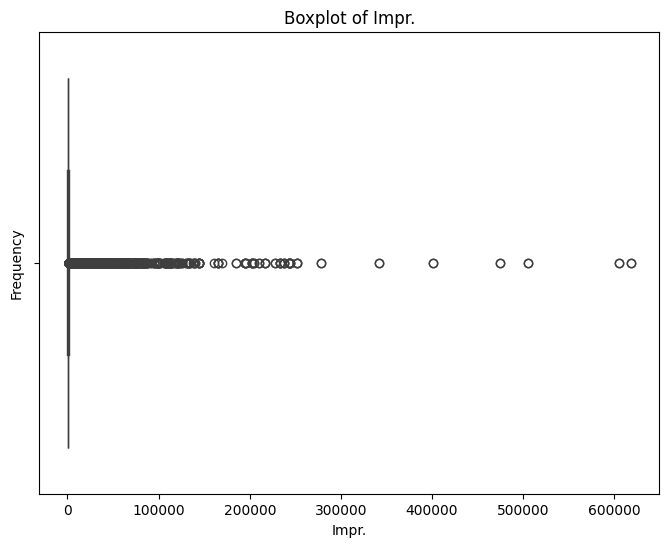

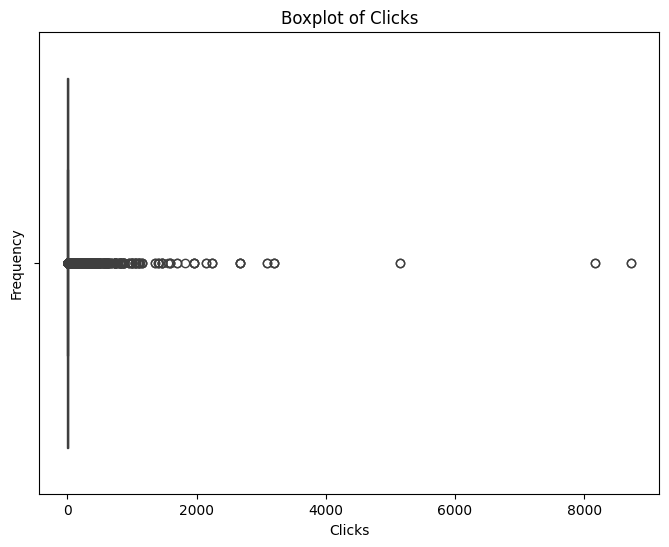

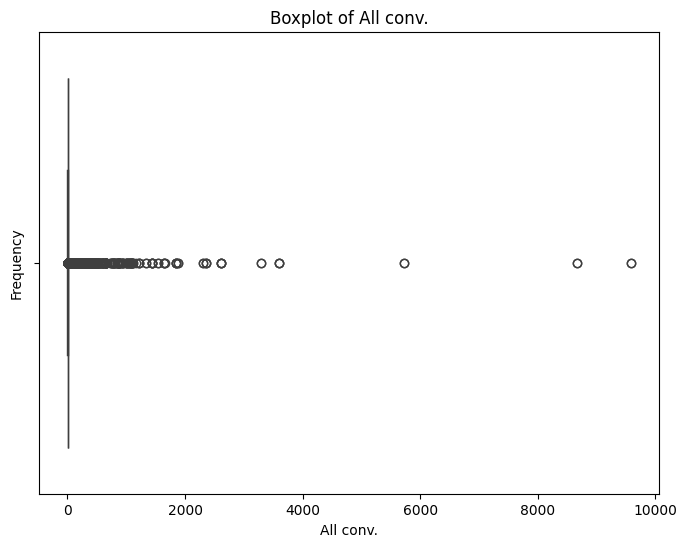

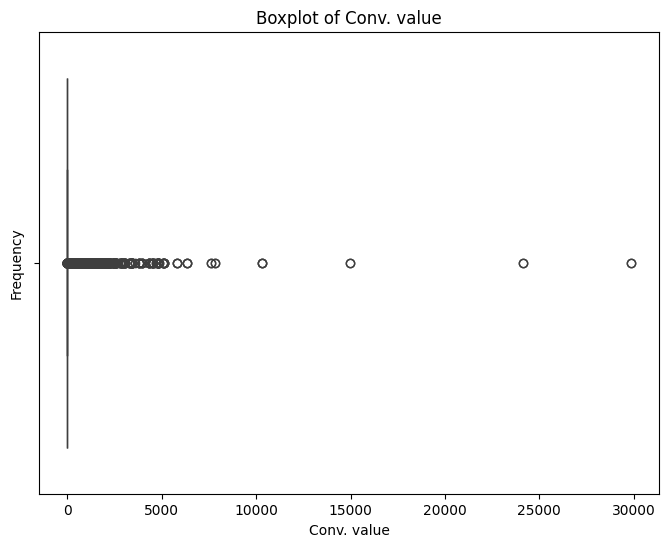

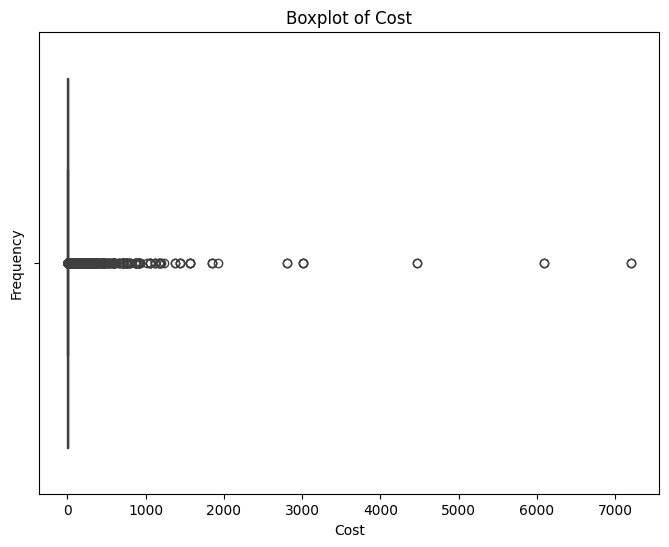

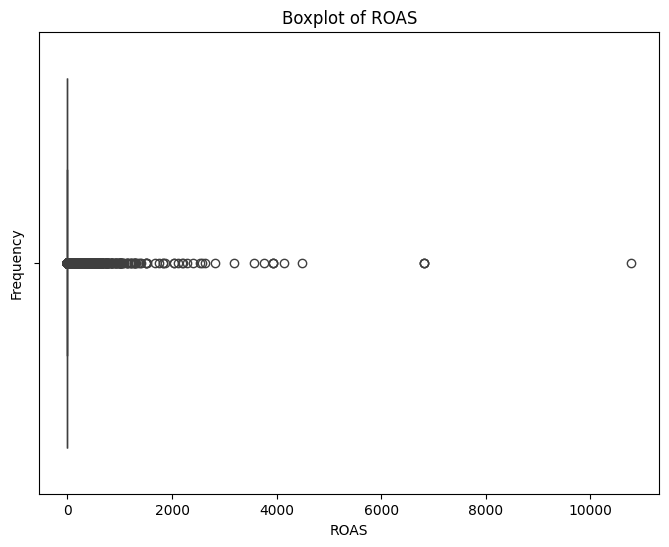

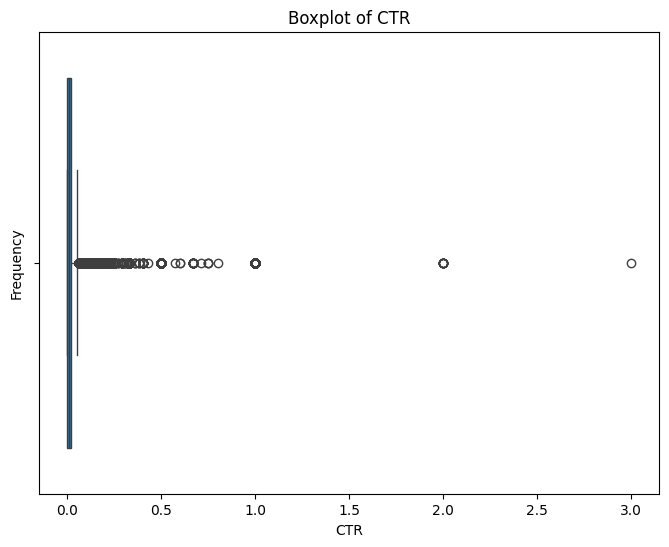

In [35]:
for column in Num.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df,x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.show()


In [15]:
#Creating a round_num function which will round the values to 0 decimal.
def round_num(x):
  return round(x,0)

In [16]:
#Creating another function which will give top n information for both August and September month.
def get_col_info(data,col1,col2,col3,n):
  result=data.pivot_table(index=col1,columns=[col2],values=col3,aggfunc='sum').fillna(0)
  top_col1=result.sort_values(by=result.columns[0],ascending=False).head(n)
  top_col1=top_col1.iloc[:,[0]].apply(round_num)
  top_col2=result.sort_values(by=result.columns[1],ascending=False).head(n)
  top_col2=top_col2.iloc[:,[1]].apply(round_num)
  return top_col1.reset_index(),top_col2.reset_index()

In [17]:
#Creating another function which will print the bar chart for top n values in the month of August and September.
def get_chart(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="Ads_Spend", ylabel = f"{a.columns[0]}", title =f'Total Spend of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="Ads_Spend", ylabel = f"{b.columns[0]}", title =f'Total Spend of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## To analyse the data further, I am not considering the effect of outliers since I don't have enough data to make sure whether the outliers are actually outliers or not.

# A) Spend Based analysis






In [19]:
df['Cost'].describe()

count    62244.000000
mean         6.892348
std         77.395970
min          0.010000
25%          0.430000
50%          1.020000
75%          2.690000
max       7206.340000
Name: Cost, dtype: float64

## 1) CampaignDetails.Campaign

<ipython-input-17-e026bc9f4210>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-17-e026bc9f4210>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


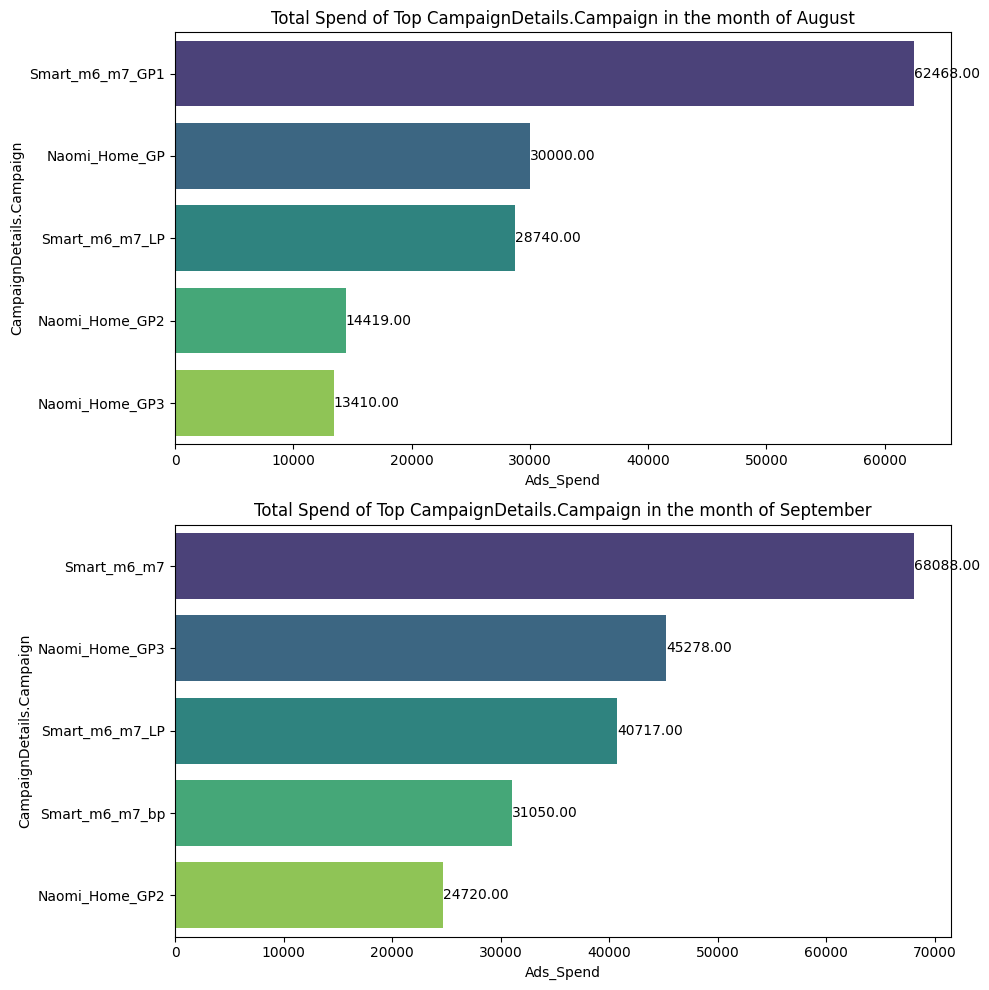

In [18]:
# Now let us dive deep into the Spend base Analysis for each categorical column.
r1,r2=get_col_info(df,'CampaignDetails.Campaign','Month_name','Cost',5)
get_chart(r1,r2)

##Lowest Spend Analysis

In [22]:
# Let us check those campaigns who have lowest Spend in the month of August.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-22-34b92ef9a45b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
CampaignDetails.Campaign,
SC_LowLoftBed_NH,1.00
SC_Helper_High,123.39
Smart_NH_HP,139.77
SC_Platform_Beds_Low,196.31
SC_Play_Kitchen_Low,253.74


In [23]:
# Let us check those campaigns who have lowest Spend in the month of September.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-23-c405f18f38a6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
CampaignDetails.Campaign,
Smart_Max_Conv_LavPet,20.43
Smart_m6_m7_GP2,2608.14
Smart_Max_Conv_GP_LT_NH,6713.89
Smart_m6_m7_GP1,7211.66
Naomi_Home_GP4,9671.65


##Conclusion:
1) Campaign: Smart_m6_m7_GP1 acquires the topmost position in ads spending in the month of August.

2) In the month of September, the topmost position is taken by Smart_m6_m7.

3)If I talk about which campaign spent lowest -> "SC_LowLoftBed_NH" in the month of August and "Smart_Max_Conv_LavPet" in the month of September.

##2) ProductDetails.Product type (2nd level)

In [24]:
df['ProductDetails.Product type (2nd level)'].describe()

count             62244
unique               93
top       home & garden
freq              44652
Name: ProductDetails.Product type (2nd level), dtype: object

<ipython-input-17-e026bc9f4210>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-17-e026bc9f4210>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


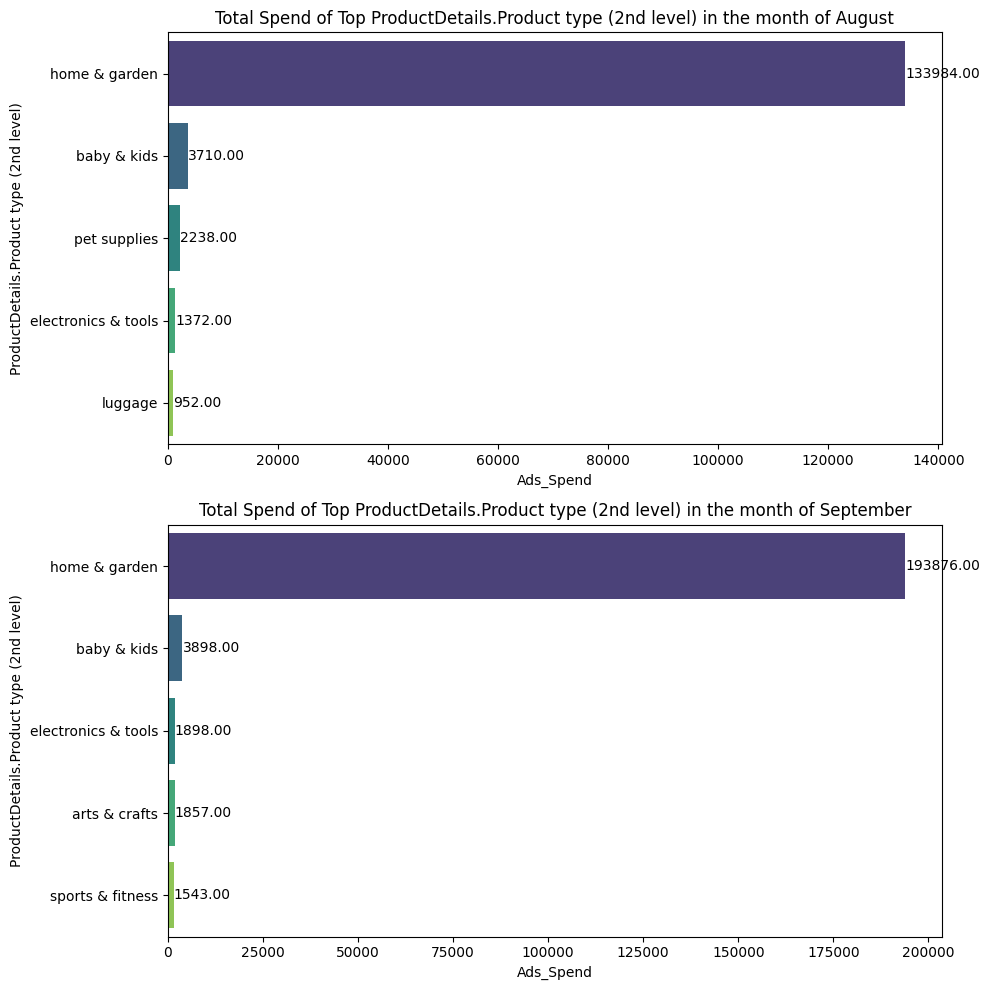

In [25]:
#Let us check the top spend for 2nd level product type.
r3,r4= get_col_info(df[df['ProductDetails.Product type (2nd level)']!='Not Available'],'ProductDetails.Product type (2nd level)','Month_name','Cost',5)
get_chart(r3,r4)

## 2nd level product type where the investment is high:
Home & garden remains at the top position in the month of August and September.


##Lowest Spend Analysis

In [537]:
# Let us check those 2nd level product type which have lowest Spend in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (2nd level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-537-fb4912e4f754>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (2nd level),
minn kota trolling motors,0.05
drawer rollers,0.11
extension cords,0.12
kids daybeds,0.12
foosball tables,0.12


In [538]:
# Let us check those 2nd level product type which have lowest Spend in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (2nd level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-538-0e3e0cc8f5f8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (2nd level),
weight plates,0.01
wall calendars,0.02
all childrens halloween costumes,0.03
landscape wall art,0.05
wine glasses,0.06


## 2nd level product type where investment is low:
1) minn kota trolling motors in the month August and weight plates in the month of September.

##3) ProductDetails.Product type (3rd level)

In [26]:
df['ProductDetails.Product type (3rd level)'].describe()

count         62244
unique          233
top       furniture
freq          17172
Name: ProductDetails.Product type (3rd level), dtype: object

<ipython-input-532-d78f74654227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-532-d78f74654227>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


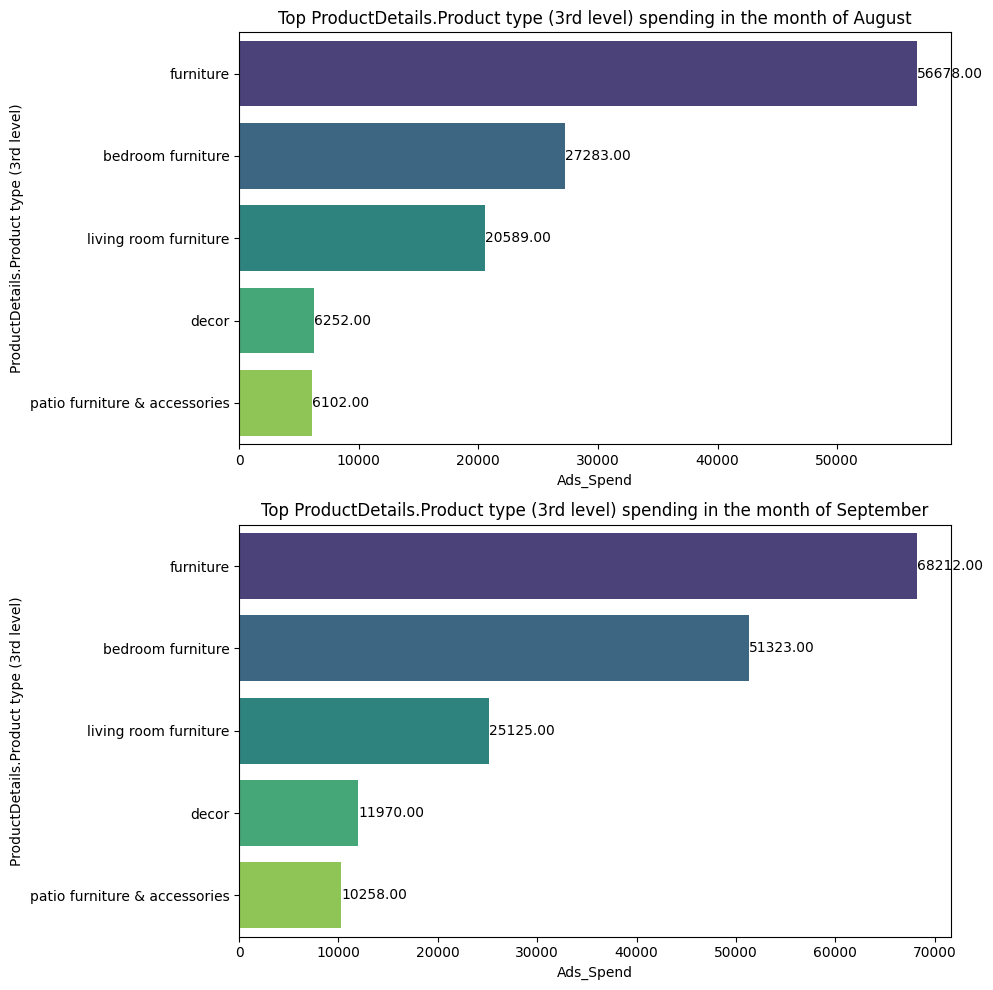

In [589]:
#Let us check the top spend for 3rd level product type.
r5,r6=get_col_info(df[df['ProductDetails.Product type (3rd level)']!='Not Available'],'ProductDetails.Product type (3rd level)','Month_name','Cost',5)
get_chart(r5,r6)

##Lowest Spend Analysis

In [40]:
# Let us check those 3rd level product type which have lowest Spend in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (3rd level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-40-bda04d8c6f6a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (3rd level),
small cat tree,0.01
cameras & camcorders,0.01
arts & crafts,0.01
crafting,0.01
fresh flowers & live indoor plants,0.01


In [541]:
# Let us check those 3rd level product type which have lowest Spend in the month of September
result=df.pivot_table(index='ProductDetails.Product type (3rd level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-541-96d313f8c5cc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (3rd level),
material handling products,0.01
raw materials,0.02
ice makers,0.03
winnie the pooh party supplies,0.05
potty training,0.06


##4) ProductDetails.Product type (4th level)

<ipython-input-532-d78f74654227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-532-d78f74654227>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


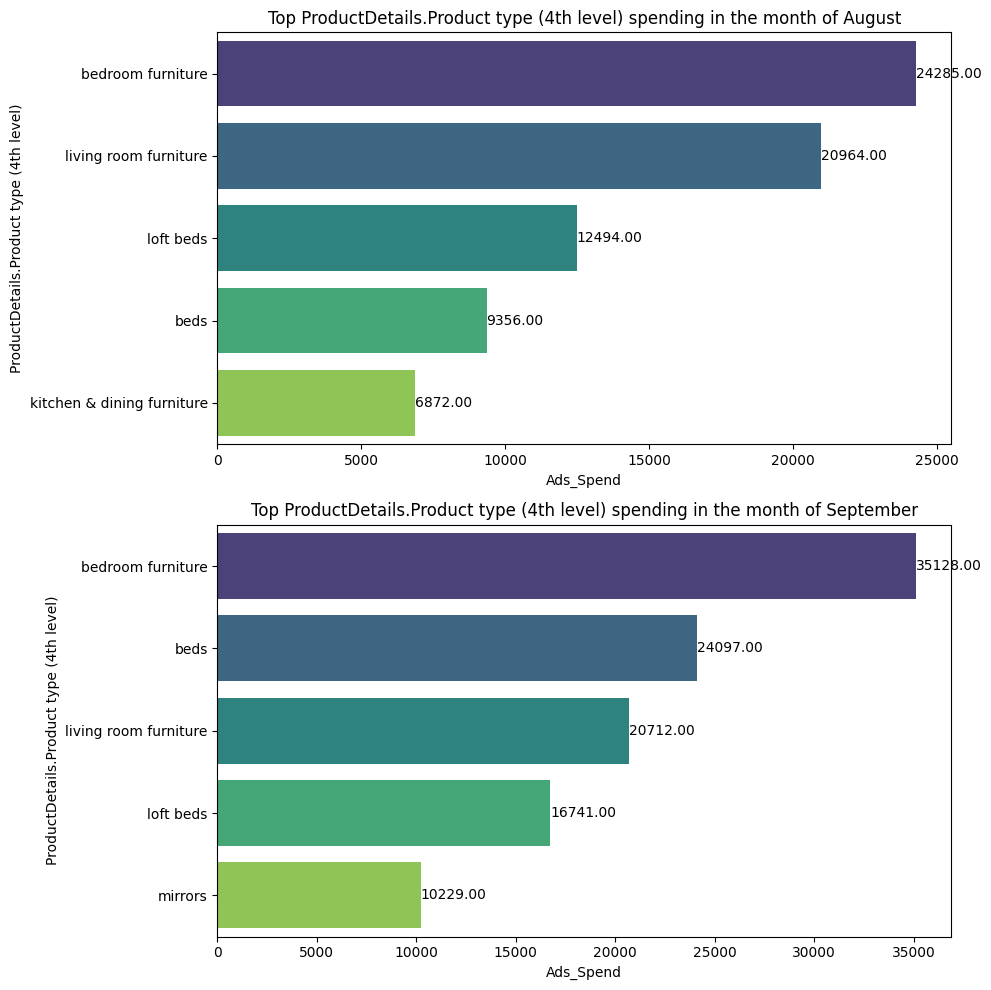

In [590]:
#Let us check the top spend for 4th level product type.
r7,r8=get_col_info(df[df['ProductDetails.Product type (4th level)']!='Not Available'],'ProductDetails.Product type (4th level)','Month_name','Cost',5)
get_chart(r7,r8)

##Lowest Spend Analysis

In [543]:
# Let us check those 4th level product type which have lowest Spend in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (4th level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-543-de186b422eb1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (4th level),
dollhouses & play sets,0.01
camera accessories,0.01
musical instruments,0.01
paper crafting,0.01
shower curtains,0.02


In [544]:
# Let us check those 4th level product type which have lowest Spend in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (4th level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-544-2451a69b283f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (4th level),
stair parts,0.01
utility carts,0.01
kickball & playground balls,0.01
character party supplies,0.01
drawers & carts,0.01


##5) ProductDetails.Product type (5th level)

<ipython-input-532-d78f74654227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-532-d78f74654227>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


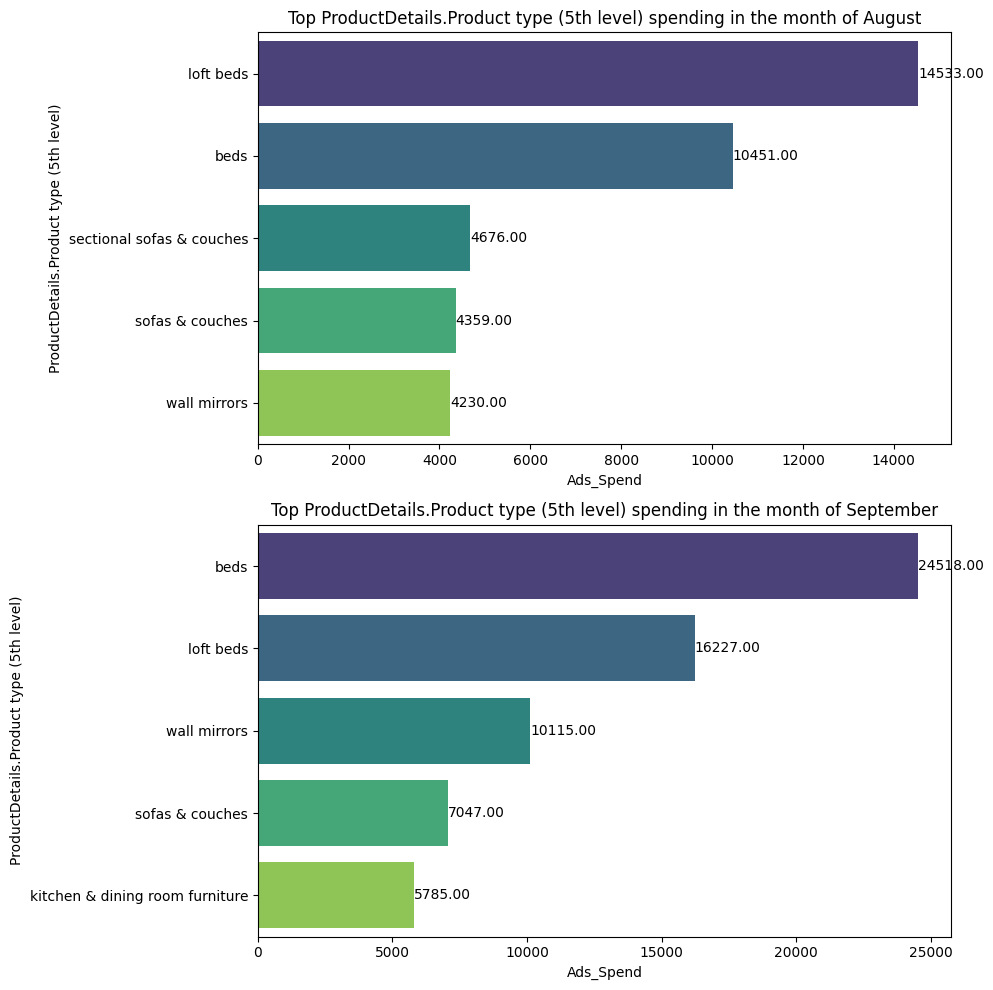

In [591]:
#Let us check the top spend for 5th level product type.
r9,r10=get_col_info(df[df['ProductDetails.Product type (5th level)']!='Not Available'],'ProductDetails.Product type (5th level)','Month_name','Cost',5)
get_chart(r9,r10)

##Lowest Spend Analysis

In [546]:
# Let us check those 5th level product type which have lowest Spend in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-546-bc0df7838f15>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (5th level),
camera bags & portability,0.01
camp kitchen,0.01
craft paper,0.01
outdoor tv covers,0.01
pianos & keyboards,0.01


In [547]:
# Let us check those 5th level product type which have lowest Spend in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='Cost',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-547-79d574263810>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (5th level),
storage & organization,0.01
knives,0.01
quilt & bedspread sets,0.01
character party decorations,0.01
artificial flowers,0.01


#B) Sales Analysis

In [548]:
#Let us now analysis the Sales for each column and modifying the chart function for xlabel.
def get_chart_sales(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="Ads_Sales", ylabel = f"{a.columns[0]}", title =f'Total Sales of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="Ads_Sales", ylabel = f"{b.columns[0]}", title =f'Total Sales of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## 1) CampaignDetails.Campaign

## Top performing campaigns in the month of August and September in respect of Sales.

<ipython-input-548-f2aeeb583b40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-548-f2aeeb583b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


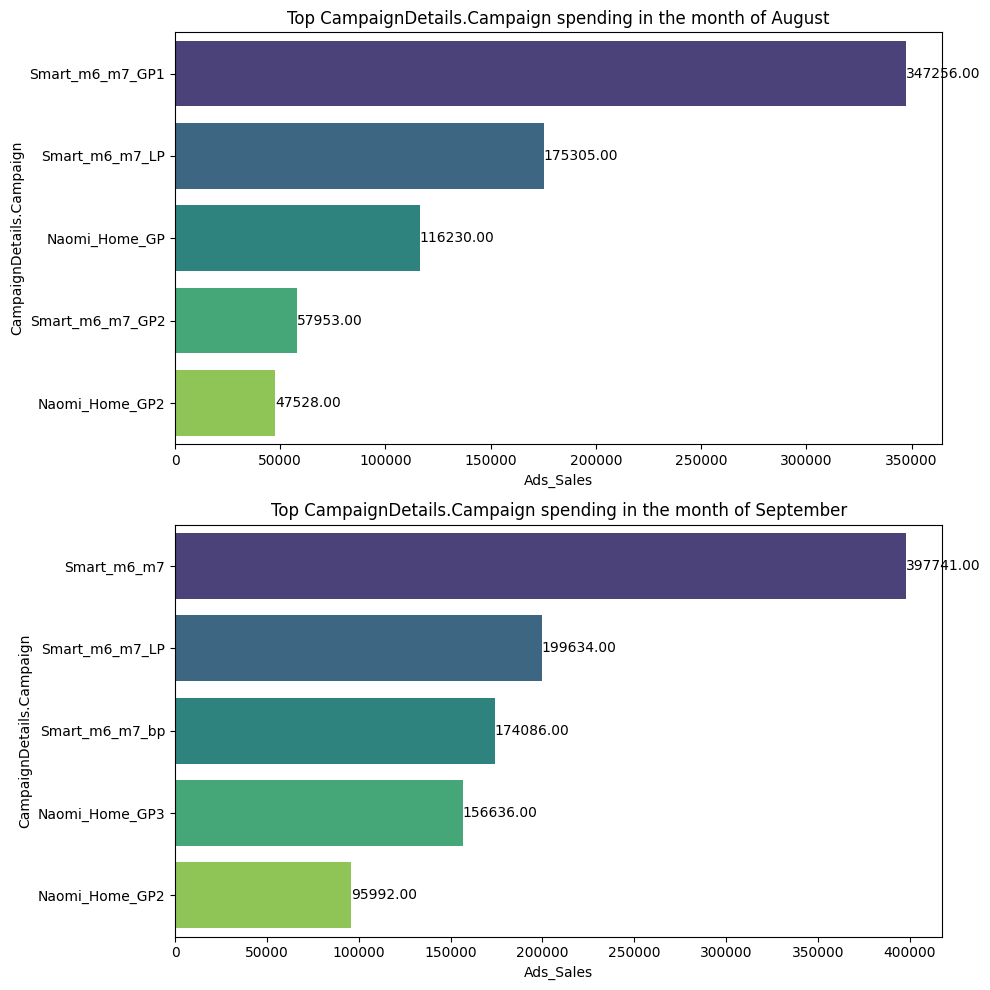

In [549]:
#Let us check the top sales Campaign wise.
r1,r2=get_col_info(df,'CampaignDetails.Campaign','Month_name','Conv. value',5)
get_chart_sales(r1,r2)

##Campaigns with lowest sales in the month of August and September.

In [550]:
# Let us check those campaigns which have lowest sales in the month of August.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-550-e8896a6d0ef0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
CampaignDetails.Campaign,
SC_Play_Kitchen_High,259.98
SC_Cindy_Low,474.28
Smart_NH_HP,1311.84
SC_Cindy_High,1734.72
SC_Platform_Beds_Low,1770.00


In [551]:
# Let us check those campaigns which have lowest sales in the month of September.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-551-50f9359264e1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
CampaignDetails.Campaign,
Smart_Max_Conv_GP_LT_NH,9654.08
Smart_m6_m7_GP2,15926.08
Naomi_Home_GP4,28694.43
Smart_m6_m7_GP1,34683.60
Naomi_Home_GP,48113.61


##2) ProductDetails.Product type (2nd level)

##Highest sales in 2nd type Product type.

<ipython-input-548-f2aeeb583b40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-548-f2aeeb583b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


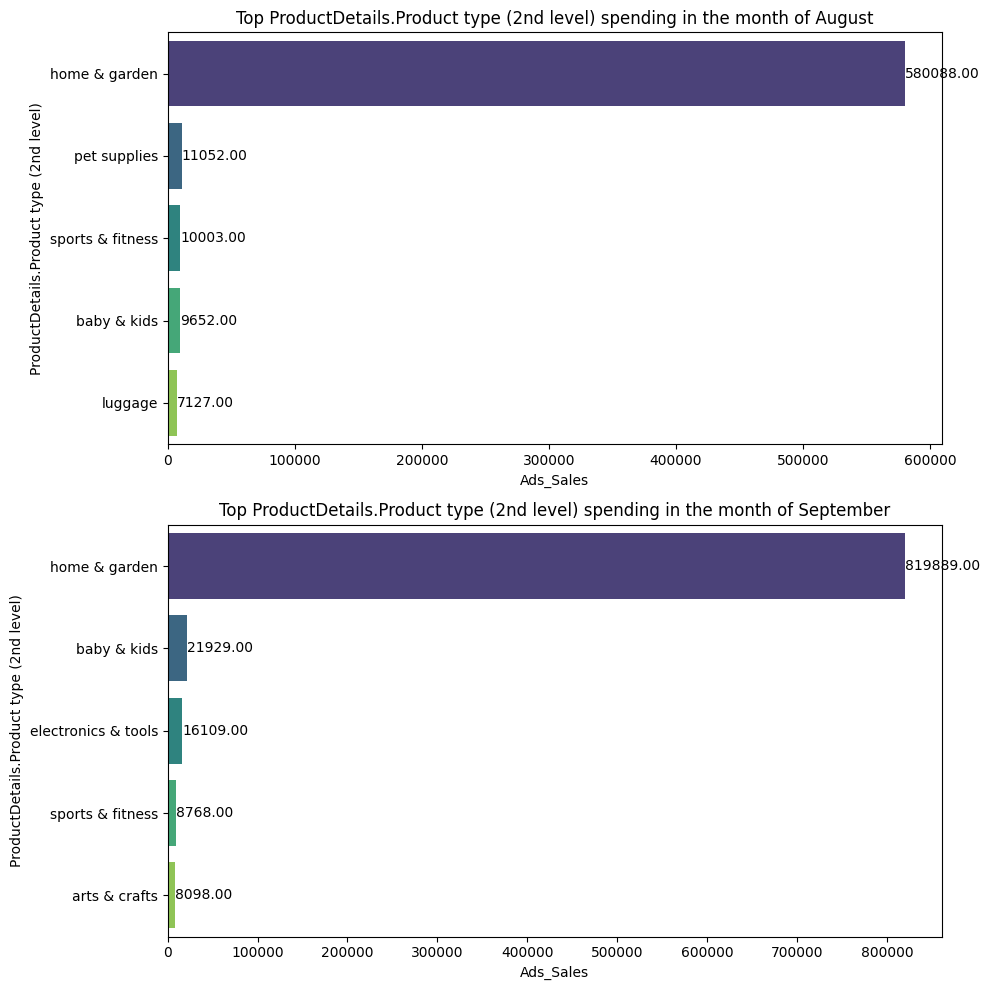

In [592]:
#Let us check the top sales for 2nd level product type.
r3,r4= get_col_info(df[df['ProductDetails.Product type (2nd level)']!='Not Available'],'ProductDetails.Product type (2nd level)','Month_name','Conv. value',5)
get_chart_sales(r3,r4)

##Lowest Sales Analysis

In [553]:
# Let us check those 2nd level product type which have lowest sales in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (2nd level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-553-ae63840f0557>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (2nd level),
gun safes,40.00
decorative throw pillows,64.08
gun cases,291.90
ventilation,601.57
ships & submarines,750.30


In [554]:
# Let us check those 2nd level product type which have lowest sales in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (2nd level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-554-6c08d672effd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (2nd level),
beds for boys,66.03
ventilation,228.10
mats,356.18
gun cases,367.23
cat trees,408.87


##3) ProductDetails.Product type (3rd level)

<ipython-input-548-f2aeeb583b40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-548-f2aeeb583b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


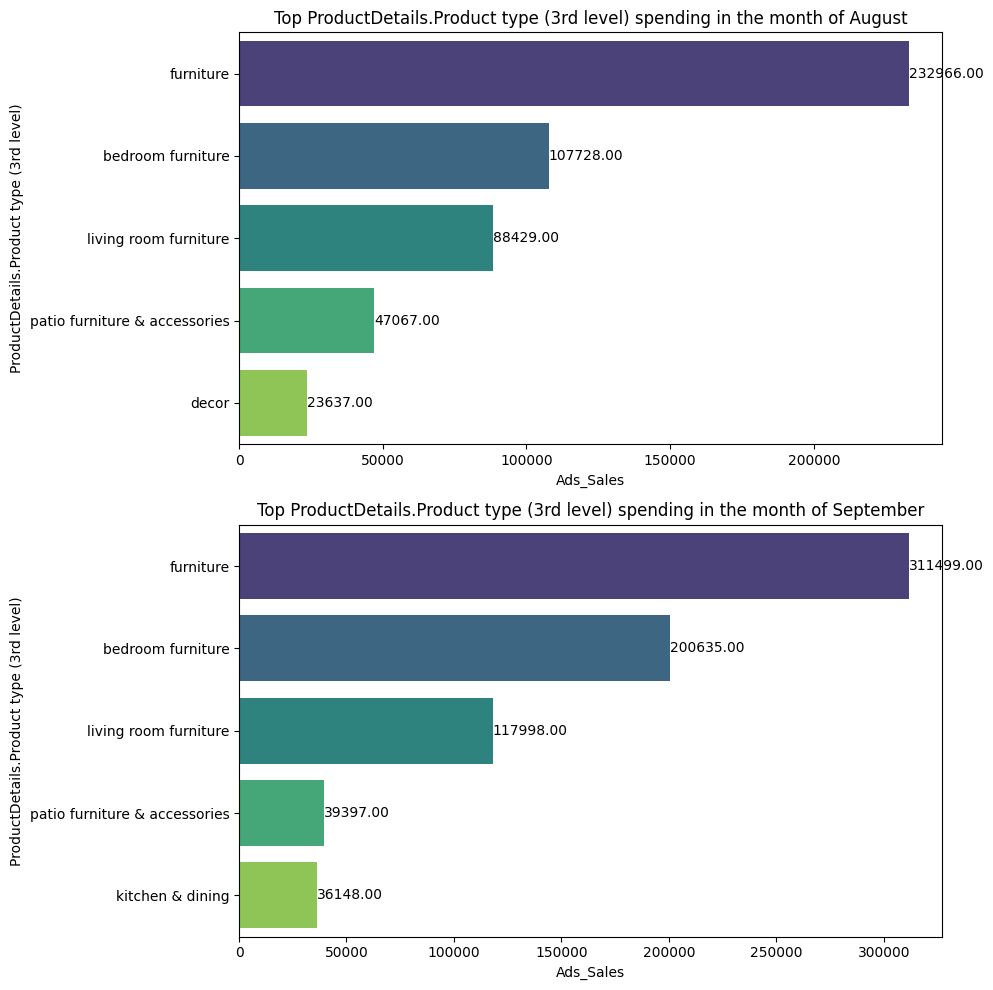

In [593]:
#Let us check the top sales for 3rd level product type.
r5,r6=get_col_info(df[df['ProductDetails.Product type (3rd level)']!='Not Available'],'ProductDetails.Product type (3rd level)','Month_name','Conv. value',5)
get_chart_sales(r5,r6)

##Lowest Sales Analysis

In [556]:
# Let us check those 3rd level product type which have lowest sales in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (3rd level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-556-4d86a6489edd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (3rd level),
outdoor heating & cooling,25.65
pens,27.31
accessories & supplies,30.81
women,46.08
cleaning supplies,48.36


In [557]:
# Let us check those 3rd level product type which have lowest sales in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (3rd level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-557-219f45225c08>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (3rd level),
tumbling mats,3.19
grills & outdoor cooking,13.33
men,40.00
hobby & collectible toys,57.73
beading & jewelry making,78.70


##4) ProductDetails.Product type (4th level)

<ipython-input-548-f2aeeb583b40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-548-f2aeeb583b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


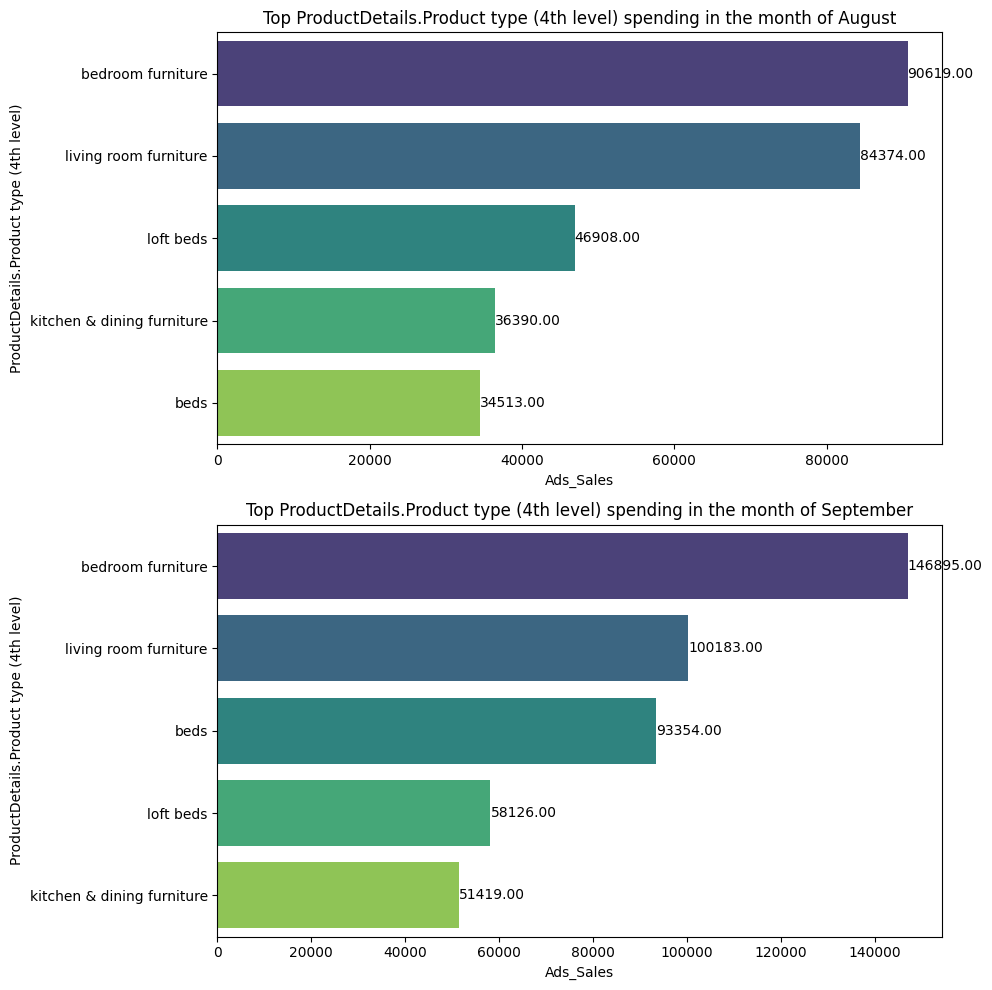

In [594]:
#Let us check the top sales for 4th level product type.
r7,r8=get_col_info(df[df['ProductDetails.Product type (4th level)']!='Not Available'],'ProductDetails.Product type (4th level)','Month_name','Conv. value',5)
get_chart_sales(r7,r8)

##Lowest Sales Analysis

In [559]:
# Let us check those 4th level product type which have lowest sales in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (4th level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-559-7c69f6d12de2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (4th level),
picture frames,12.16
posters & prints,12.68
fire pits,25.65
audio & video accessories,30.81
console & sofa tables,40.00


In [560]:
# Let us check those 5th level product type which have lowest sales in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (4th level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-560-480d306a5574>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (4th level),
exercise & fitness accessories,3.19
gymnastics,3.19
other sports,3.19
grills,13.33
dog carriers & travel,20.00


##5) ProductDetails.Product type (5th level)

<ipython-input-548-f2aeeb583b40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-548-f2aeeb583b40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


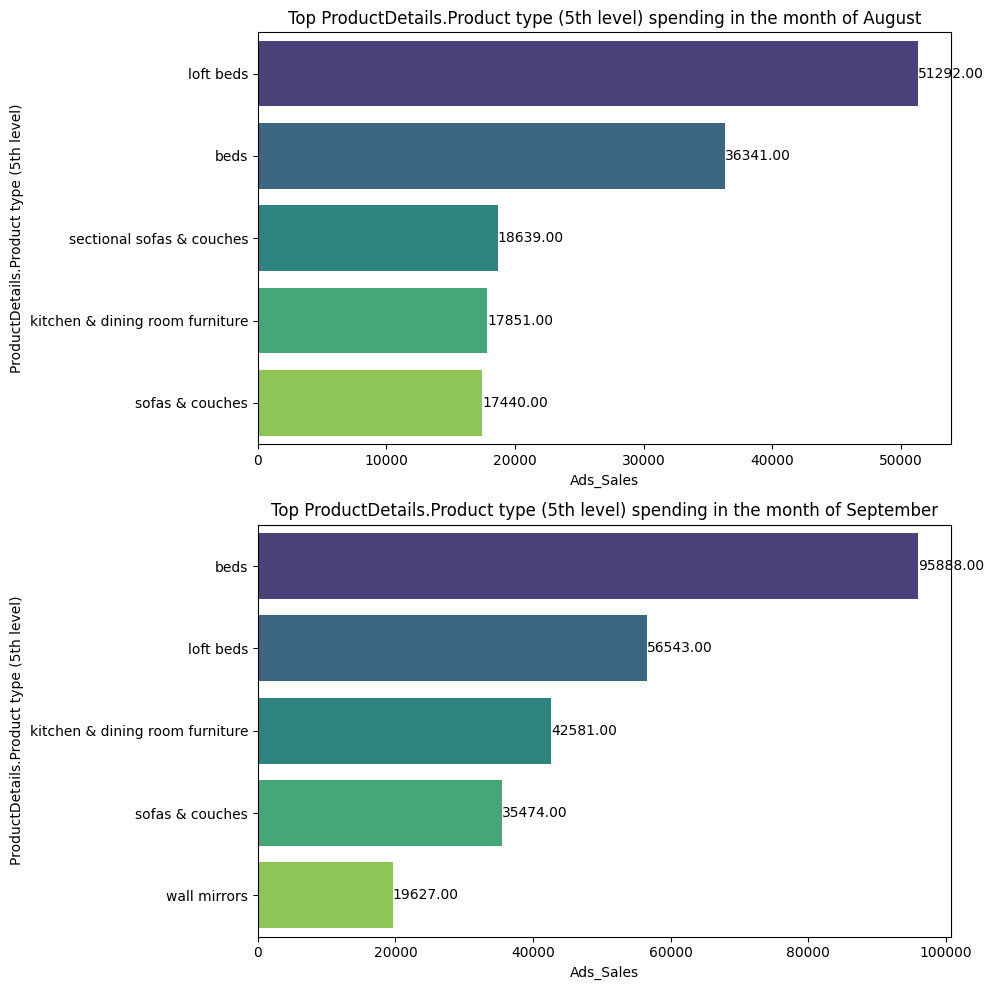

In [595]:
#Let us check the top sales for 5th level product type.
r9,r10=get_col_info(df[df['ProductDetails.Product type (5th level)']!='Not Available'],'ProductDetails.Product type (5th level)','Month_name','Conv. value',5)
get_chart_sales(r9,r10)

##Lowest Sales Analysis

In [562]:
# Let us check those 5th level product type which have lowest sales in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-562-065c56c66a73>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (5th level),
strength training equipment,7.29
teaching materials,18.60
gas fire pits,25.65
media storage & organization,30.81
corner bookcases & bookshelves,40.00


In [563]:
# Let us check those 5th level product type which have lowest sales in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='Conv. value',aggfunc='sum').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-563-b87f70cccdbc>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (5th level),
set of 2 dining chairs,0.10
pub tables & sets,1.78
all exercise and fitness accessories,3.19
gymnastics,3.19
black dining sets,5.55


#3) ROAS Analysis

In [564]:
#Creating another function which will give top n information for both August and September month.
def get_col_info_roas(data,col1,col2,col3,n):
  result=data.pivot_table(index=col1,columns=[col2],values=col3,aggfunc='mean').fillna(0)
  top_col1=result.sort_values(by=result.columns[0],ascending=False).head(n)
  top_col1=top_col1.iloc[:,[0]].apply(round_num)
  top_col2=result.sort_values(by=result.columns[1],ascending=False).head(n)
  top_col2=top_col2.iloc[:,[1]].apply(round_num)
  return top_col1.reset_index(),top_col2.reset_index()

In [565]:
# Let us move to analyse the ROAS against each campaign and product type and modify the chart function for xlabel
def get_chart_roas(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="ROAS", ylabel = f"{a.columns[0]}", title =f'Average ROAS of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="ROAS", ylabel = f"{b.columns[0]}", title =f'Average ROAS of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## 1) CampaignDetails.Campaign

<ipython-input-565-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-565-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


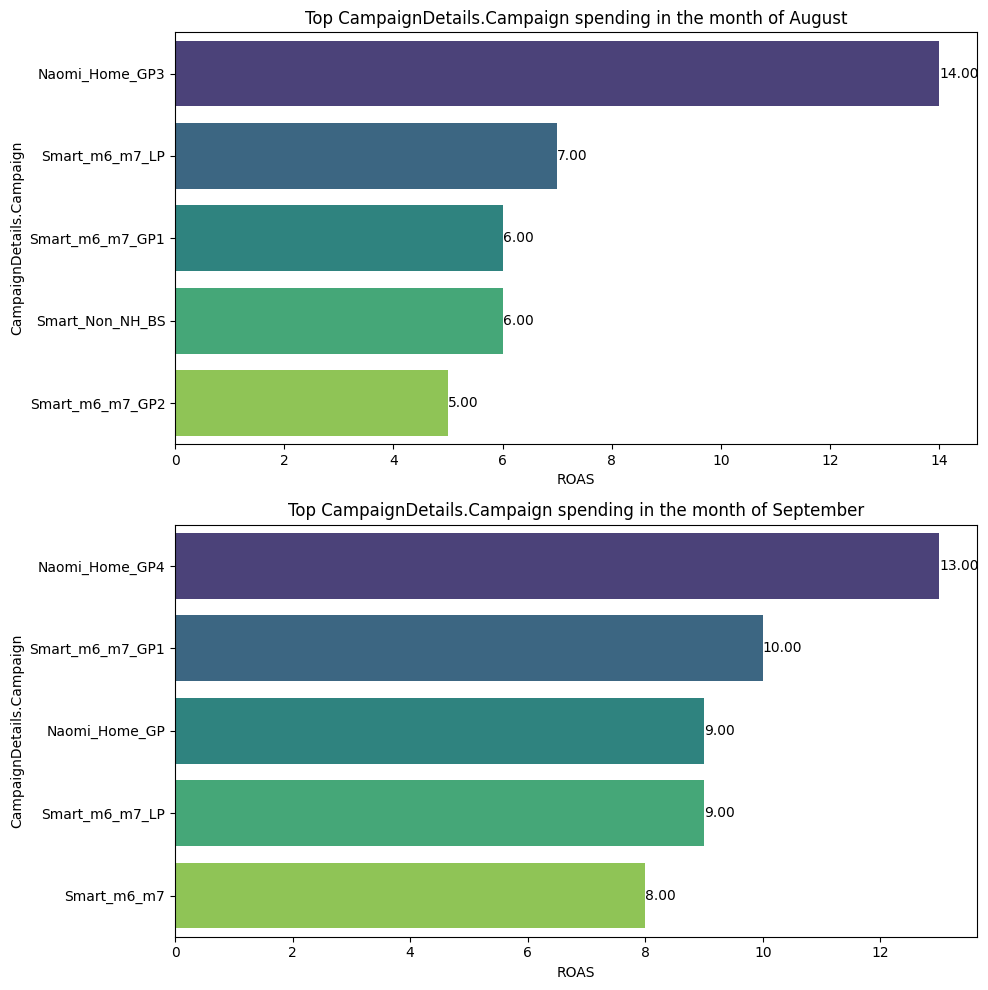

In [566]:
#Let us check the top ROAS against Campaign.
r1,r2=get_col_info_roas(df,'CampaignDetails.Campaign','Month_name','ROAS',5)
get_chart_roas(r1,r2)

##Lowest ROAS Analysis

In [567]:
# Let us check those campaigns which have lowest ROAS value in the month of August.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-567-40ddf445eef9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
CampaignDetails.Campaign,
SC_Play_Kitchen_High,0.069746
SC_Cindy_High,0.353050
SC_Cindy_Low,0.550273
StandardShopping_MaxClicks_All_NH,0.864293
Naomi_Home_GP2,1.155016


In [568]:
# Let us check those campaigns which have lowest ROAS value in the month of September.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-568-3d80b3eb31ab>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
CampaignDetails.Campaign,
Smart_m6_m7_GP2,2.279634
Naomi_Home_GP2,2.683622
Smart_Max_Conv_GP_LT_NH,6.906408
Naomi_Home_GP3,7.592539
Smart_m6_m7_bp,8.047447


##2) ProductDetails.Product type (2nd level)

<ipython-input-565-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-565-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


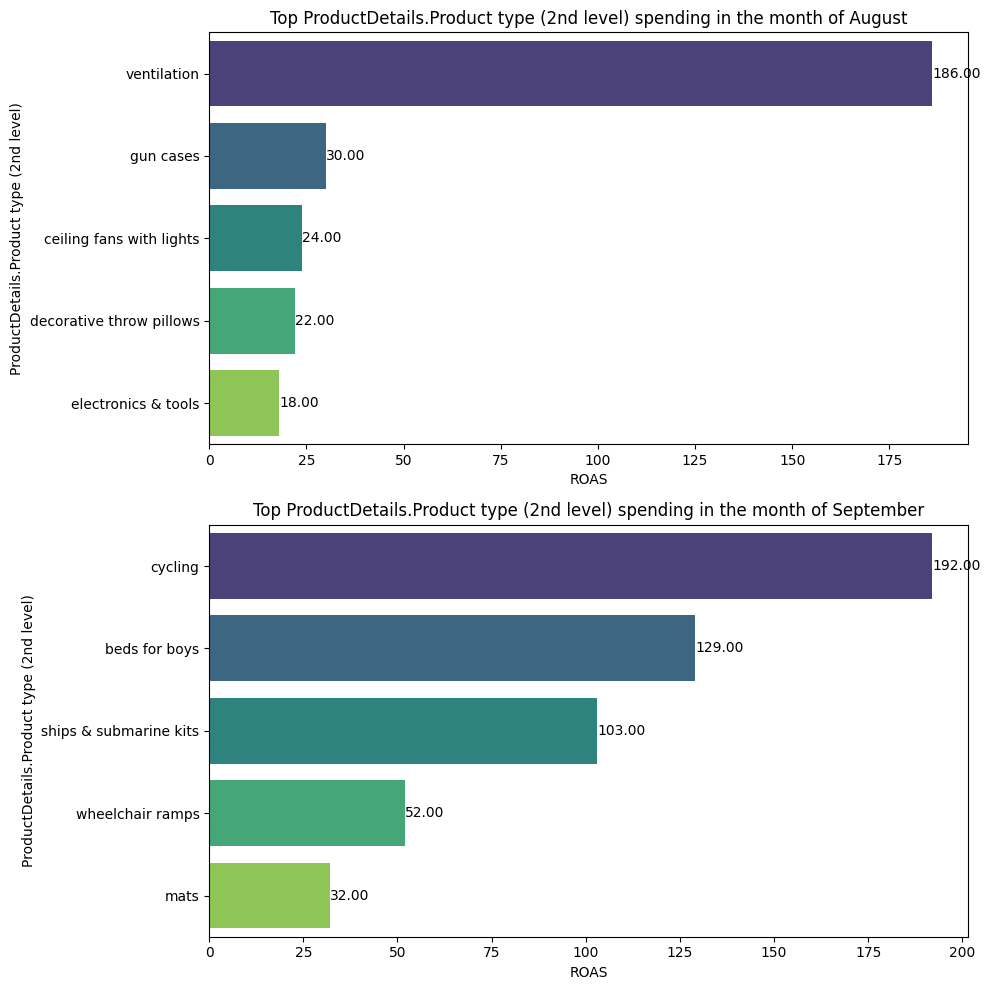

In [569]:
#Let us check the top ROAS value for 2nd level product type.
r3,r4= get_col_info_roas(df,'ProductDetails.Product type (2nd level)','Month_name','ROAS',5)
get_chart_roas(r3,r4)

##Lowest ROAS Analysis

In [570]:
# Let us check those 2nd level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (2nd level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-570-ed6addfebcad>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (2nd level),
wooden nursery gliders,1.817954
shelving storage,3.314951
baby & kids,4.773083
home & garden,5.186513
cycling,7.096639


In [571]:
# Let us check those 2nd level product type which have lowest ROAS value in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (2nd level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-571-a915281cdbf2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (2nd level),
kids beds,1.466526
cat trees,1.954614
arts & crafts,2.657204
camping & hiking,4.872081
ventilation,5.241268


##3) ProductDetails.Product type (3rd level)

<ipython-input-565-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-565-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


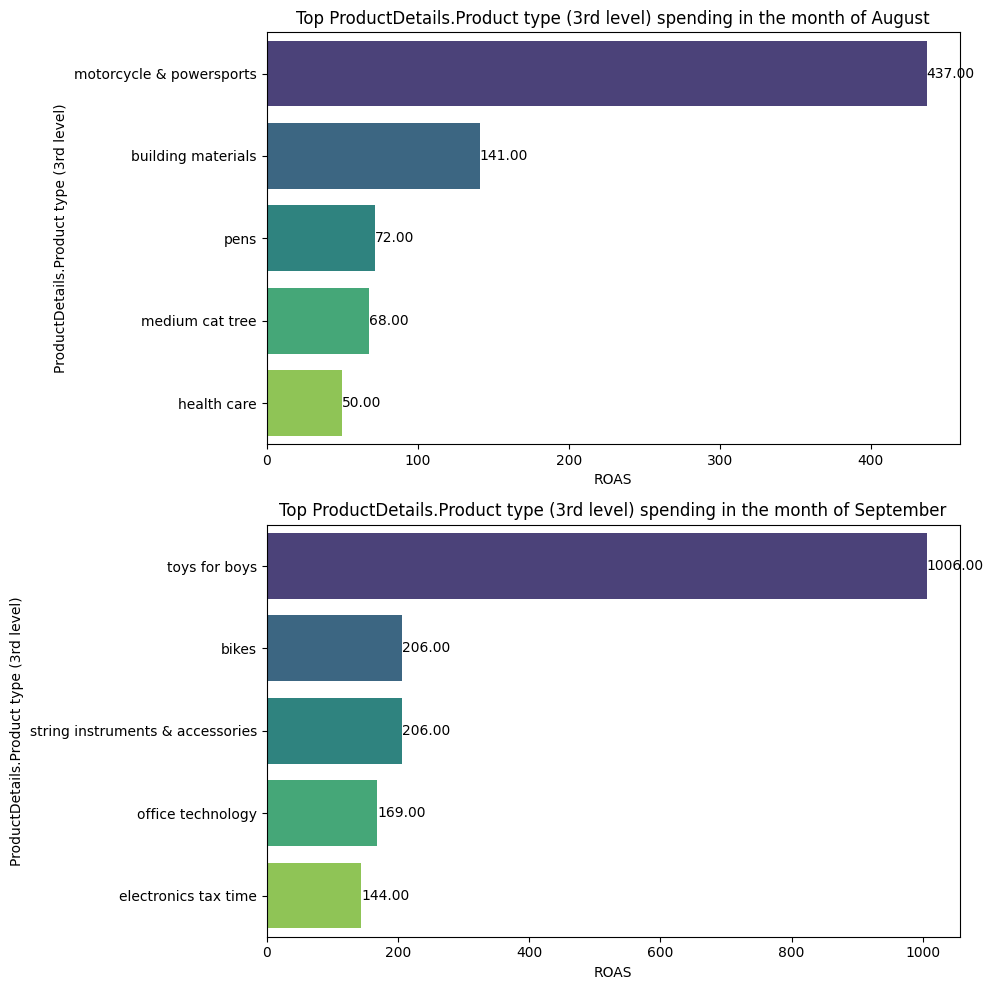

In [572]:
#Let us check the top ROAS value for 3rd level product type.
r5,r6=get_col_info_roas(df,'ProductDetails.Product type (3rd level)','Month_name','ROAS',5)
get_chart_roas(r5,r6)

##Lowest ROAS Analysis

In [573]:
# Let us check those 3rd level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (3rd level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-573-6727c5bb2322>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (3rd level),
sports & outdoor play,0.077495
outdoor heating & cooling,0.335733
sheds & outdoor storage,0.383712
medical supplies & equipment,1.022711
birds,1.187165


In [574]:
# Let us check those 3rd level product type which have lowest ROAS value in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (3rd level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-574-532935df4318>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (3rd level),
tumbling mats,0.092330
men,0.254372
wall art,0.285083
hobby & collectible toys,0.295506
exercise & fitness,0.789919


##4) ProductDetails.Product type (4th level)

<ipython-input-565-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-565-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


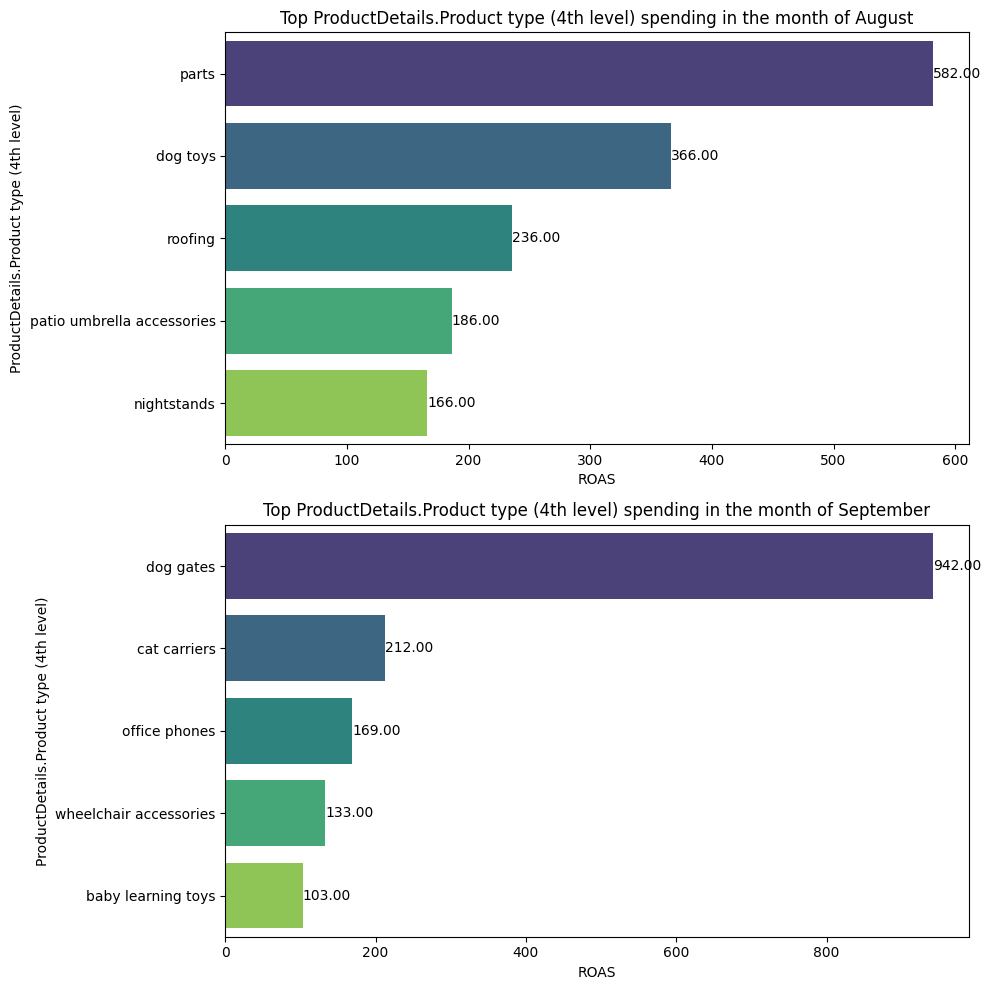

In [575]:
#Let us check the top ROAS value for 4th level product type.
r7,r8=get_col_info_roas(df,'ProductDetails.Product type (4th level)','Month_name','ROAS',5)
get_chart_roas(r7,r8)

##Lowest ROAS Analysis

In [576]:
# Let us check those 4th level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (4th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-576-a3425b4c8a89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (4th level),
posters & prints,0.002922
pots,0.150126
picture frames,0.192893
sandboxes & water tables,0.274756
console & sofa tables,0.335261


In [577]:
# Let us check those 4th level product type which have lowest ROAS value in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (4th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-577-a6c1e1593dca>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (4th level),
canopies,0.085892
gymnastics,0.153883
exercise & fitness accessories,0.234559
model kits,0.295506
dog carriers & travel,0.406174


##5) ProductDetails.Product type (5th level)

<ipython-input-565-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-565-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


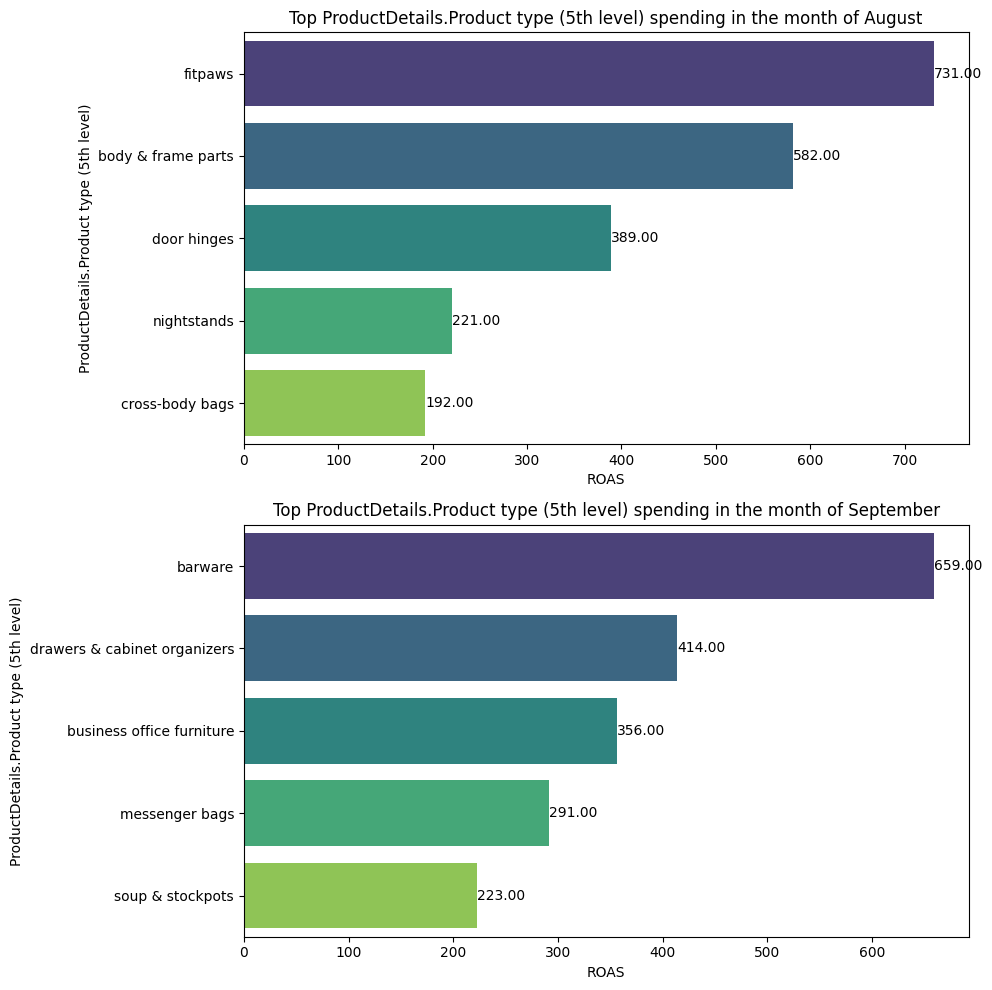

In [578]:
#Let us check the top ROAS value for 5th level product type.
r9,r10=get_col_info_roas(df,'ProductDetails.Product type (5th level)','Month_name','ROAS',5)
get_chart_roas(r9,r10)

##Lowest ROAS Analysis

In [579]:
# Let us check those 5th level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()

<ipython-input-579-d665277849b6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head()


Month_name,August
ProductDetails.Product type (5th level),
teaching materials,0.093112
strength training equipment,0.099863
office chairs,0.327792
armoires,0.336001
console & sofa tables,0.339904


In [580]:
# Let us check those 5th level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()

<ipython-input-580-97bbbc627bae>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head()


Month_name,September
ProductDetails.Product type (5th level),
set of 2 dining chairs,0.004742
metal dining sets,0.014003
pub tables & sets,0.182377
grey sectional sofas,0.339998
all exercise and fitness accessories,0.390931


##Identify the Top and Bottom 10 Product Categories (Level 5) in terms of ad performance. Are there any reasons you can attribute to their top or bottom performance based on the dataset ?

## There can be 3 metrics which can identify the top and bottom performance-
##1) ROAS
##2) CVR
##3) CTR

In [580]:
#Let us start our analysis with ROAS first-

##1) ROAS

In [602]:
#Creating another function which will give top n information for both August and September month.
def get_col_info_roas(data,col1,col2,col3,n):
  result=data.pivot_table(index=col1,columns=[col2],values=col3,aggfunc='mean').fillna(0)
  top_col1=result.sort_values(by=result.columns[0],ascending=False).head(n)
  top_col1=top_col1.iloc[:,[0]].apply(round_num)
  top_col2=result.sort_values(by=result.columns[1],ascending=False).head(n)
  top_col2=top_col2.iloc[:,[1]].apply(round_num)
  return top_col1.reset_index(),top_col2.reset_index()

In [603]:
# Let us move to analyse the ROAS against each campaign and product type and modify the chart function for xlabel
def get_chart_roas(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="ROAS", ylabel = f"{a.columns[0]}", title =f'Average ROAS of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="ROAS", ylabel = f"{b.columns[0]}", title =f'Average ROAS of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## ProductDetails.Product type (5th level)

<ipython-input-603-fc4dd35277be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-603-fc4dd35277be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


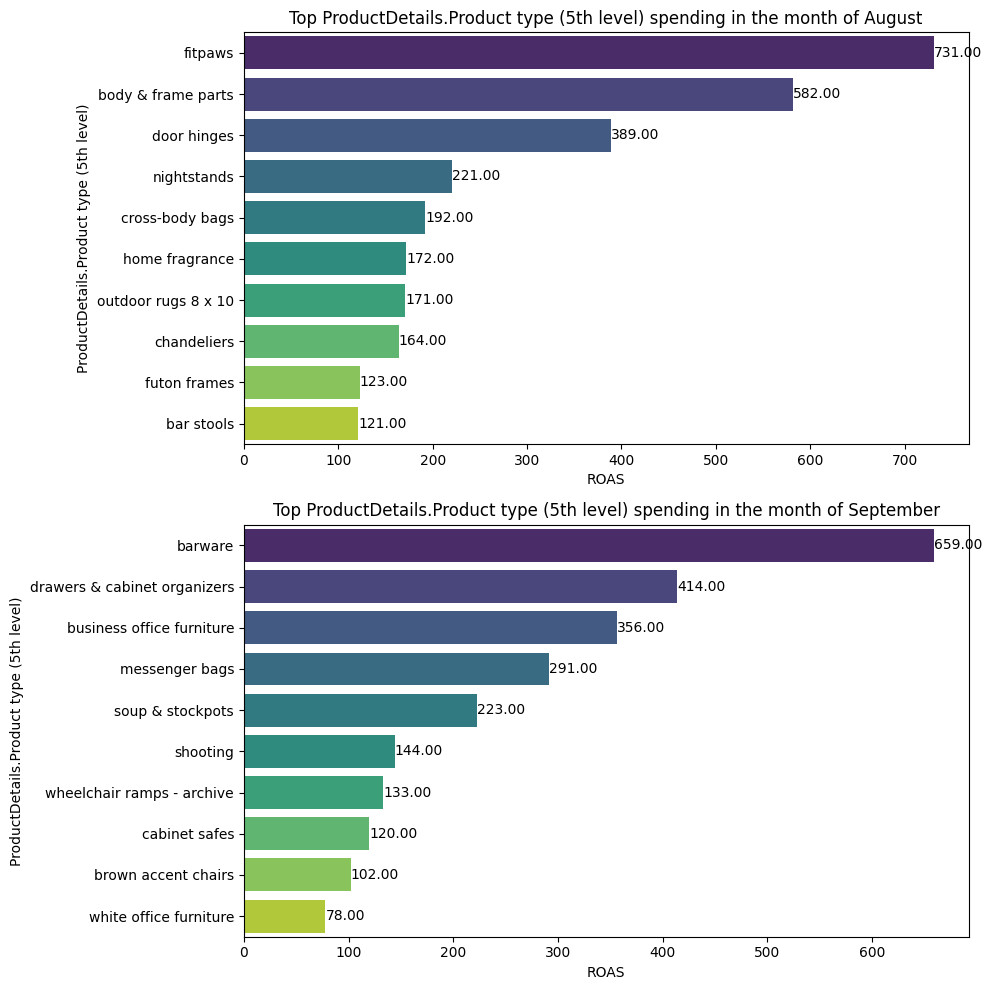

In [604]:
#Let us check the top ROAS value for 5th level product type.
r9,r10=get_col_info_roas(df,'ProductDetails.Product type (5th level)','Month_name','ROAS',10)
get_chart_roas(r9,r10)

##Lowest ROAS Analysis

In [605]:
# Let us check those 5th level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-605-94533ddc06ff>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (5th level),
teaching materials,0.093112
strength training equipment,0.099863
office chairs,0.327792
armoires,0.336001
console & sofa tables,0.339904
modern/contemporary accent chairs,0.362679
bedroom vanities,0.397276
leather loveseats,0.430258
patio furniture sets,0.533502


In [606]:
# Let us check those 5th level product type which have lowest ROAS value in the month of August.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='ROAS').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-606-1b38572d8469>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (5th level),
set of 2 dining chairs,0.004742
metal dining sets,0.014003
pub tables & sets,0.182377
grey sectional sofas,0.339998
all exercise and fitness accessories,0.390931
ottomans,0.431138
football,0.474093
wall lamps & sconces,0.588235
baseball & softball,0.622117


#2) CVR

In [609]:
#Creating another function which will give top n information for both August and September month.
def get_col_info_cvr(data,col1,col2,col3,n):
  result=data.pivot_table(index=col1,columns=[col2],values=col3,aggfunc='mean').fillna(0)
  top_col1=result.sort_values(by=result.columns[0],ascending=False).head(n)
  top_col1=top_col1.iloc[:,[0]].apply(round_num)
  top_col2=result.sort_values(by=result.columns[1],ascending=False).head(n)
  top_col2=top_col2.iloc[:,[1]].apply(round_num)
  return top_col1.reset_index(),top_col2.reset_index()

In [610]:
# Let us move to analyse the CVR against each campaign and product type and modify the chart function for xlabel
def get_chart_cvr(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="CVR", ylabel = f"{a.columns[0]}", title =f'Average CVR of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="CVR", ylabel = f"{b.columns[0]}", title =f'Average CVR of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## ProductDetails.Product type (5th level)

<ipython-input-610-d43e54b2fb4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-610-d43e54b2fb4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


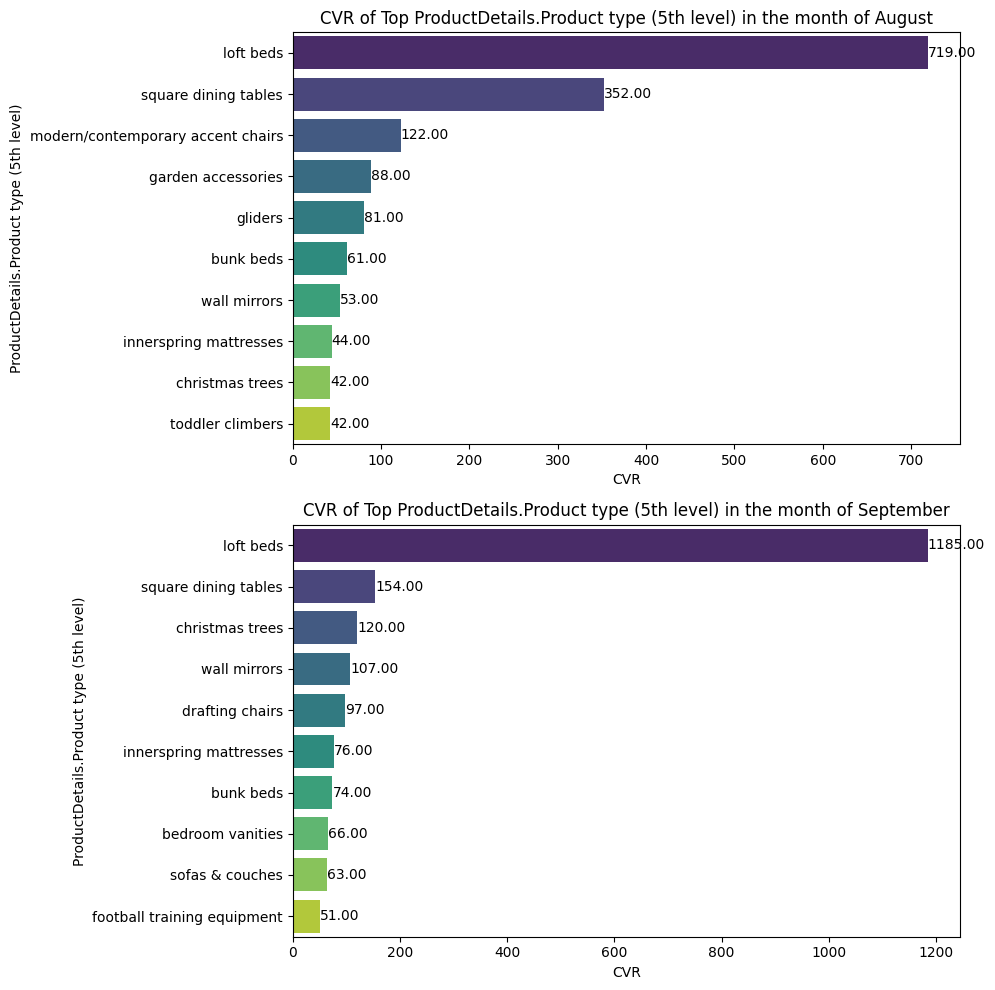

In [615]:
#Let us check the top CVR value for 5th level product type.
r9,r10=get_col_info_cvr(df,'ProductDetails.Product type (5th level)','Month_name','All conv.',10)
get_chart_cvr(r9,r10)

##Lowest CVR Analysis

In [613]:
# Let us check those 5th level product type which have lowest CVR value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='All conv.').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-613-48c3bb2bac22>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (5th level),
garden stakes,0.500000
basic mattress pads & protectors,0.500000
black dining sets,0.500000
mid-century loveseats,0.500000
kitchen tools & gadgets,0.500000
mechanics tools,0.500000
duvet cover sets,0.500000
increase strength,0.500000
storage lockers,0.500000


In [614]:
# Let us check those 5th level product type which have lowest CVR value in the month of August.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='All conv.').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-614-ccda37ed7fb1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (5th level),
door levers,0.500000
towel holders,0.500000
all pans,0.500000
fishing,0.500000
rebounders,0.500000
play set attachments,0.500000
daycare furniture,0.500000
nesting tables,0.600000
showers,0.666667


##3) CTR

In [625]:
# Let us move to analyse the CVR against each campaign and product type and modify the chart function for xlabel
def get_chart_ctr(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="CTR", ylabel = f"{a.columns[0]}", title =f'Average of CTR of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="CTR", ylabel = f"{b.columns[0]}", title =f'Average of CTR of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## ProductDetails.Product type (5th level)

In [635]:
# Let us check those 5th level product type which have Highest CTR value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='CTR').fillna(0)
result.sort_values(by='August',ascending=False)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-635-afc2c26c5273>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=False)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (5th level),
toilet seats and lids,1.000000
cabinet hardware,1.000000
microfiber sheets,1.000000
kitchen rugs,0.676667
plates,0.597500
coat hooks,0.587143
round end tables,0.500000
umbrella stands & bases,0.500000
office fitness,0.500000


In [637]:
# Let us check those 5th level product type which have Highest CTR value in the month of September.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='CTR').fillna(0)
result.sort_values(by='September',ascending=False)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-637-5e7cbfacb08e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=False)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (5th level),
queen comforters,1.00
grill covers,1.00
artificial flowers,1.00
under-cabinet lights,1.00
surface protection,0.67
framed wall art,0.56
lamp shades,0.51
storage & organization,0.50
cotton sheets,0.50


##Lowest CTR Analysis

In [619]:
# Let us check those 5th level product type which have lowest CTR value in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='CTR').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-619-bf9b45d6c666>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (5th level),
emergency preparedness,0.001111
over the door mirrors,0.001481
dining benches,0.001667
fly fishing,0.002500
fabric futons,0.003333
computer keyboards & mice,0.003333
birds,0.003333
swimming pools,0.003333
gymnastics,0.003333


In [620]:
# Let us check those 5th level product type which have lowest CTR value in the month of August.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='CTR').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-620-ac22cc61c44a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (5th level),
portable garages,0.001111
range hoods,0.001250
arbors,0.002000
mini fridges & compact refrigerators,0.002500
washing machines,0.002500
costumes & dress up,0.002500
saws,0.003000
pressure cookers,0.003333
toy boxes & chests,0.003333


#CPA analysis in support of ASk 5

In [645]:
#Let us create the cost per conversion column which is equal to the cost/conversion.
df['CPA']=np.where(df['All conv.']!=0,round(df['Cost']/df['All conv.'],2),0)

In [647]:
df['CPA'].describe()

count    62244.000000
mean         0.737561
std          3.263034
min          0.000000
25%          0.150000
50%          0.440000
75%          0.800000
max        660.330000
Name: CPA, dtype: float64

In [648]:
#Creating another function which will give top n information for both August and September month.
def get_col_info_cpa(data,col1,col2,col3,n):
  result=data.pivot_table(index=col1,columns=[col2],values=col3,aggfunc='mean').fillna(0)
  top_col1=result.sort_values(by=result.columns[0],ascending=False).head(n)
  top_col1=top_col1.iloc[:,[0]].apply(round_num)
  top_col2=result.sort_values(by=result.columns[1],ascending=False).head(n)
  top_col2=top_col2.iloc[:,[1]].apply(round_num)
  return top_col1.reset_index(),top_col2.reset_index()

In [649]:
#Creating another function which will print the bar chart for top n values in the month of August and September.
def get_chart_cpa(a,b):
  fig, axes = plt.subplots(2, 1, figsize=(10, 10))
  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
  ax1.set(xlabel ="CPA", ylabel = f"{a.columns[0]}", title =f'Average CPA of Top {a.columns[0]} in the month of {a.columns[1]}')
  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])
  ax2.set(xlabel ="CPA", ylabel = f"{b.columns[0]}", title =f'Average CPA of Top {b.columns[0]} in the month of {b.columns[1]}')
  for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.2f')
  for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.2f')
  plt.tight_layout()

## 1) CampaignDetails.Campaign

<ipython-input-649-83e4025e6411>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-649-83e4025e6411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


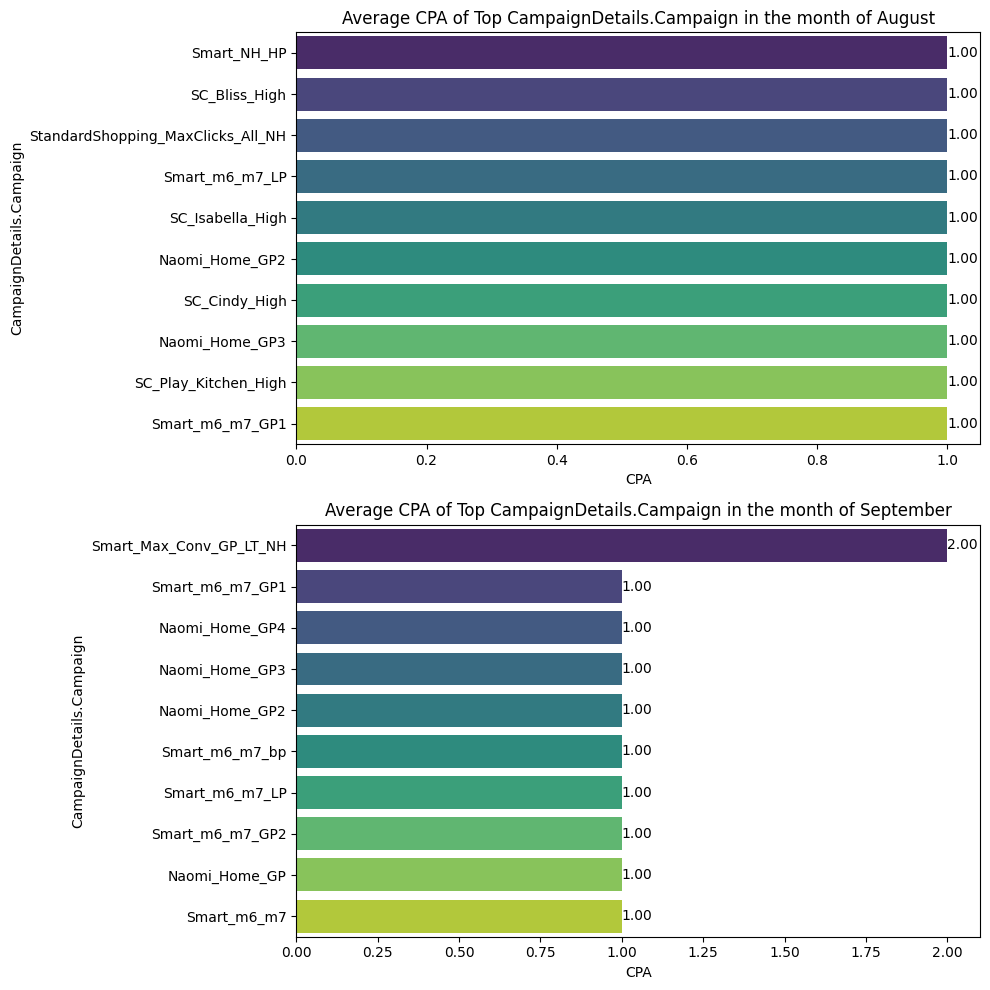

In [653]:
# Now let us dive deep into the CPA base Analysis for each categorical column.
r1,r2=get_col_info_cpa(df,'CampaignDetails.Campaign','Month_name','CPA',10)
get_chart_cpa(r1,r2)

##Lowest CPA Analysis

In [658]:
# Let us check those campaigns who have lowest CPA in the month of August.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-658-207255db3871>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
CampaignDetails.Campaign,
SC_LowLoftBed_NH,0.500000
SC_Platform_Beds_Low,0.512308
Smart_Non_NH_BS,0.581788
SC_Cindy_Low,0.583333
SC_Helper_High,0.585652
Naomi_Home_GP,0.621317
SC_Play_Kitchen_Low,0.630000
Smart_m6_m7_GP2,0.647911
Smart_m6_m7_GP1,0.714914


In [659]:
# Let us check those campaigns who have lowest CPA in the month of September.
result=df.pivot_table(index='CampaignDetails.Campaign',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-659-aa18b91fe437>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
CampaignDetails.Campaign,
Smart_m6_m7,0.701830
Naomi_Home_GP,0.736698
Smart_m6_m7_GP2,0.775972
Smart_m6_m7_LP,0.787027
Smart_m6_m7_bp,0.895076
Naomi_Home_GP2,0.902453
Naomi_Home_GP3,0.907410
Naomi_Home_GP4,0.965675
Smart_m6_m7_GP1,1.113571


##2) ProductDetails.Product type (2nd level)

<ipython-input-649-83e4025e6411>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-649-83e4025e6411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


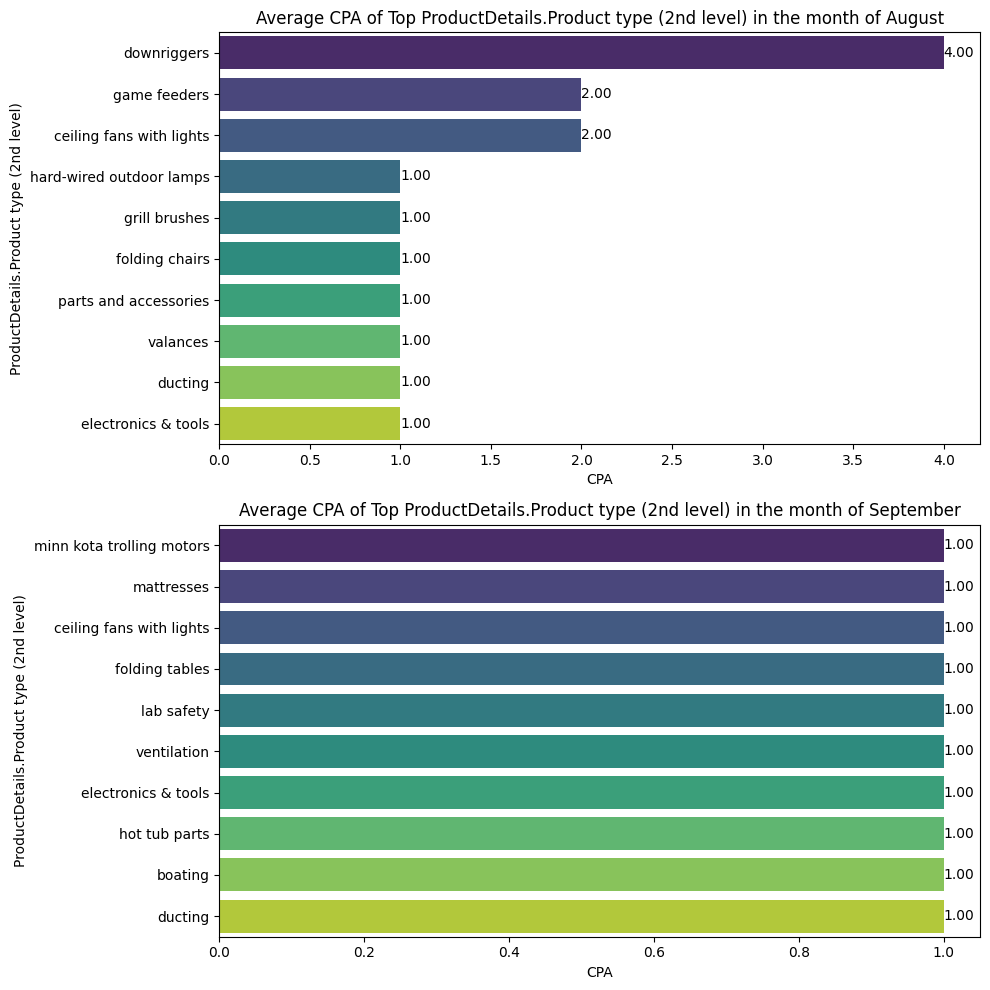

In [661]:
#Let us check the top CPA for 2nd level product type.
r3,r4= get_col_info_cpa(df[df['ProductDetails.Product type (2nd level)']!='Not Available'],'ProductDetails.Product type (2nd level)','Month_name','CPA',10)
get_chart_cpa(r3,r4)

##Bottom Chart for Campaign

In [662]:
# Let us check those 2nd level product type which have lowest CPA in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (2nd level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-662-4889e411b778>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (2nd level),
foosball tables,0.030
rv equipment covers,0.030
all home speakers,0.045
minn kota trolling motors,0.050
ceiling fan parts,0.060
skates,0.065
drawer rollers,0.110
plastic storage bins & boxes,0.115
cat furniture & scratchers,0.115


In [663]:
# Let us check those 2nd level product type which have lowest CPA in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (2nd level)',columns='Month_name',values='Cost').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-663-5abae004cfad>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (2nd level),
weight plates,0.010
wall calendars,0.020
all childrens halloween costumes,0.030
landscape wall art,0.050
wine glasses,0.060
baby,0.080
kids nightstands,0.090
star wars cardboard stand-ups,0.105
plastic storage bins & boxes,0.120


##3) ProductDetails.Product type (3rd level)

<ipython-input-649-83e4025e6411>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-649-83e4025e6411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


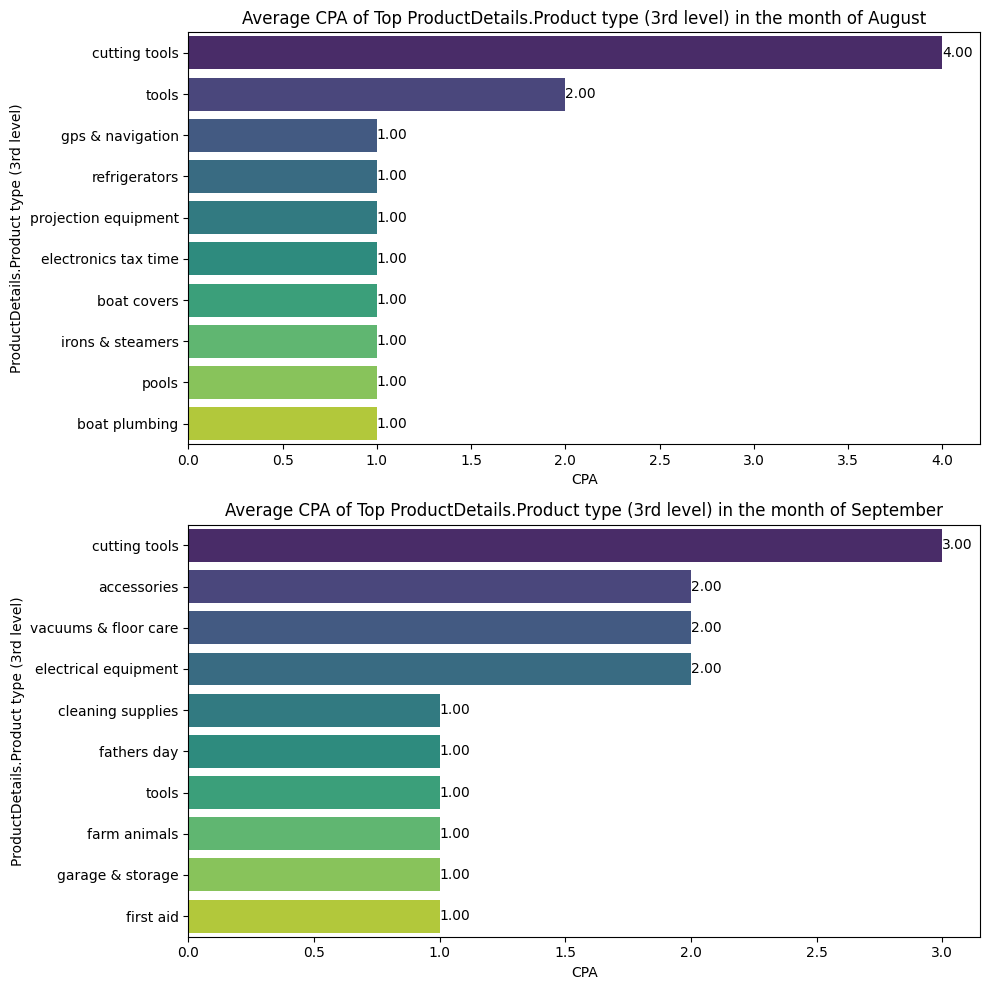

In [664]:
#Let us check the top CPA for 3rd level product type.
r5,r6=get_col_info_cpa(df[df['ProductDetails.Product type (3rd level)']!='Not Available'],'ProductDetails.Product type (3rd level)','Month_name','CPA',10)
get_chart_cpa(r5,r6)

##Bottom Chart for Campaign

In [665]:
# Let us check those 3rd level product type which have lowest CPA in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (3rd level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-665-17716b0a66d3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (3rd level),
crafting,0.010000
fresh flowers & live indoor plants,0.010000
small cat tree,0.010000
cameras & camcorders,0.010000
winnie the pooh party supplies,0.015000
games & puzzles,0.023333
pens,0.025000
beauty next day,0.043333
speaker systems,0.045000


In [667]:
# Let us check those 3rd level product type which have lowest CPA in the month of September
result=df.pivot_table(index='ProductDetails.Product type (3rd level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-667-95c8fbe66731>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (3rd level),
ice makers,0.005000
winnie the pooh party supplies,0.010000
material handling products,0.010000
wall ovens,0.030000
janitorial & sanitation supplies,0.030000
games & puzzles,0.035000
diapering,0.047500
renewable energy,0.050000
party supplies,0.060000


##4) ProductDetails.Product type (4th level)

<ipython-input-649-83e4025e6411>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-649-83e4025e6411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


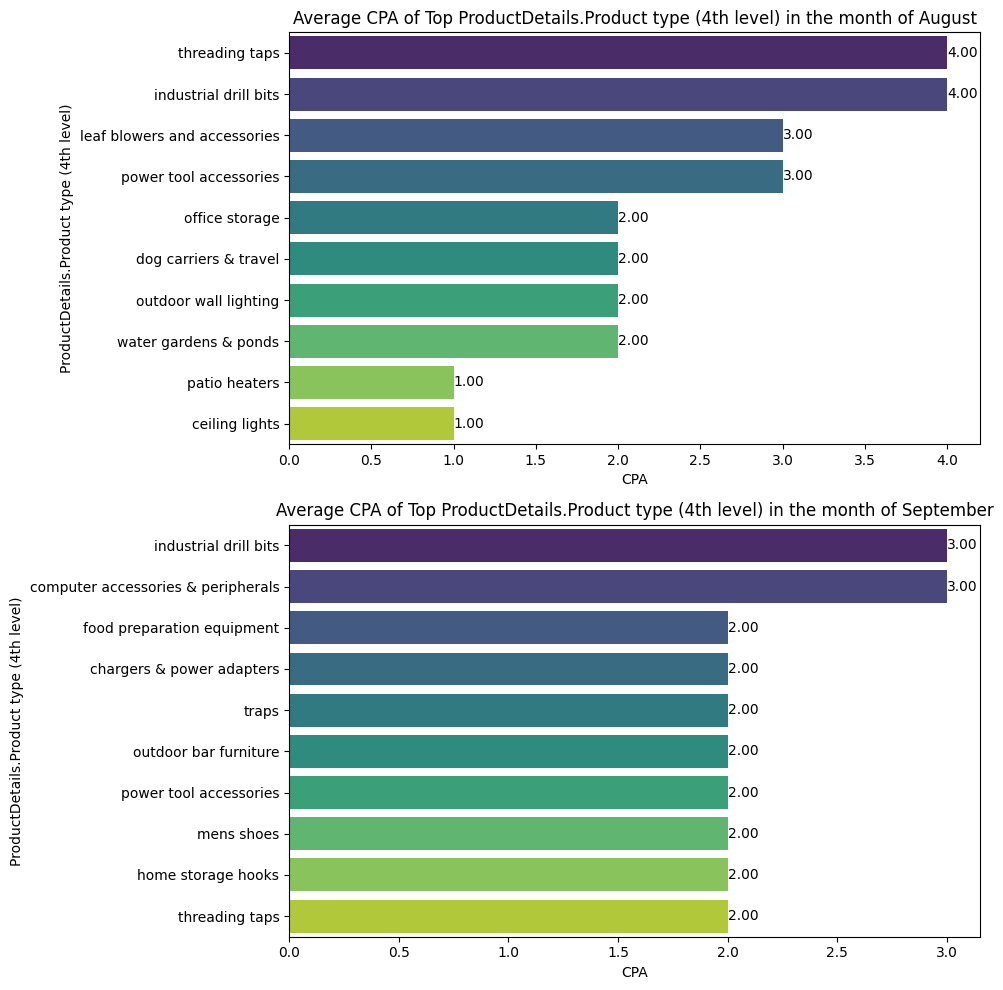

In [668]:
#Let us check the top CPA for 4th level product type.
r7,r8=get_col_info_cpa(df[df['ProductDetails.Product type (4th level)']!='Not Available'],'ProductDetails.Product type (4th level)','Month_name','CPA',10)
get_chart_cpa(r7,r8)

##Bottom Chart for Campaign

In [669]:
# Let us check those 4th level product type which have lowest CPA in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (4th level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-669-91699762fcb5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (4th level),
board games,0.005000
insect & pest control,0.005000
optimize performance,0.005000
paper crafting,0.010000
dollhouses & play sets,0.010000
cots & hammocks,0.010000
musical instruments,0.010000
camera accessories,0.010000
kickball & playground balls,0.010000


In [670]:
# Let us check those 4th level product type which have lowest CPA in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (4th level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-670-8655ec68d8bb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (4th level),
stair parts,0.010
ribbons,0.010
character party supplies,0.010
kickball & playground balls,0.010
dollhouses & play sets,0.010
play sets & playground equipment,0.018
lighting & electrical,0.020
electrical tools,0.030
floor care,0.030


##5) ProductDetails.Product type (5th level)

<ipython-input-649-83e4025e6411>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1= sns.barplot(x=a.columns[1],y=a.columns[0],data=a,orient='h',palette='viridis',ax=axes[0])
<ipython-input-649-83e4025e6411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.barplot(x=b.columns[1],y=b.columns[0],data=b,orient='h',palette='viridis',ax=axes[1])


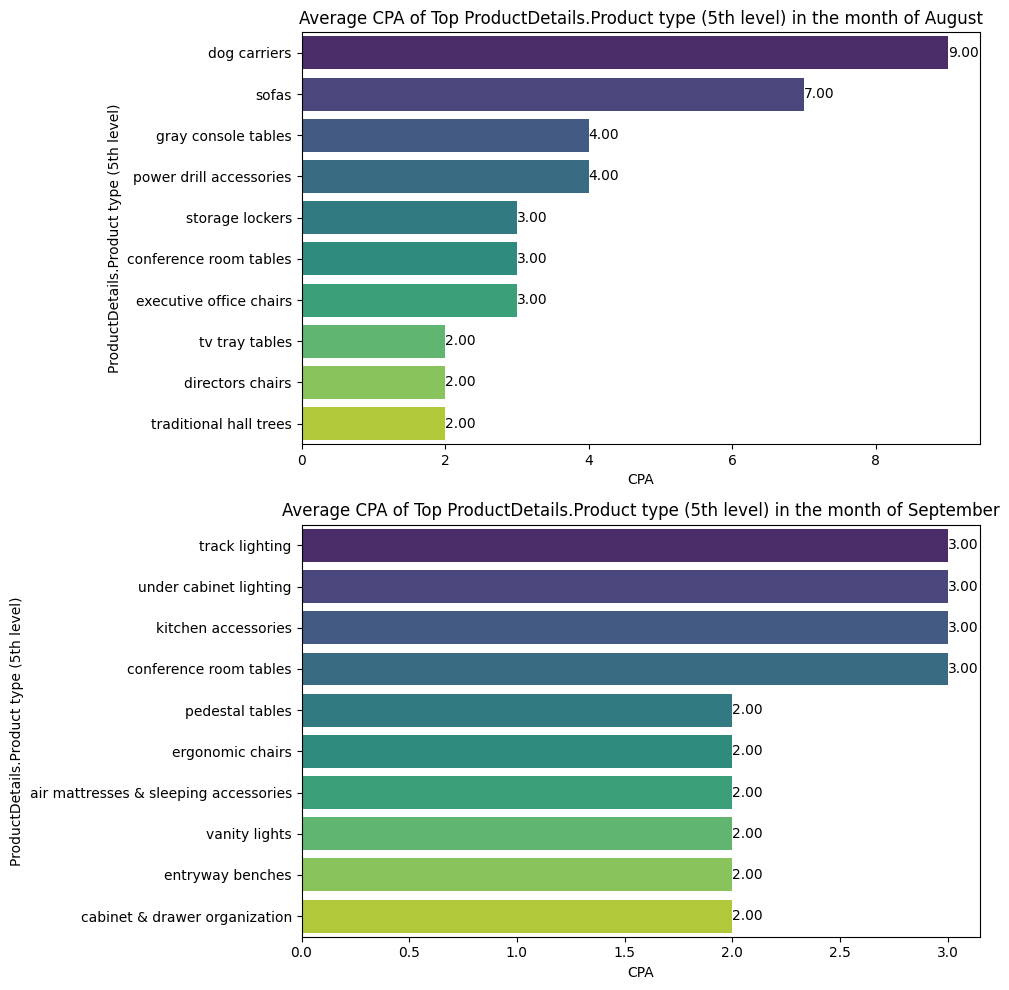

In [671]:
#Let us check the top CPA for 5th level product type.
r9,r10=get_col_info_cpa(df[df['ProductDetails.Product type (5th level)']!='Not Available'],'ProductDetails.Product type (5th level)','Month_name','CPA',10)
get_chart_cpa(r9,r10)

##Bottom Chart for Campaign

In [673]:
# Let us check those 5th level product type which have lowest CPA in the month of August.
result=df.pivot_table(index= 'ProductDetails.Product type (5th level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)

<ipython-input-673-068be44585ea>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='August',ascending=True)[result['August']>0].iloc[:,[0]].head(10)


Month_name,August
ProductDetails.Product type (5th level),
basic mattress pads & protectors,0.005
increase strength,0.005
camp kitchen,0.010
craft paper,0.010
outdoor tv covers,0.010
seat covers,0.010
lifting equipment,0.010
hammocks,0.010
door locks and deadbolts,0.010


In [674]:
# Let us check those 5th level product type which have lowest CPA in the month of September.
result=df.pivot_table(index='ProductDetails.Product type (5th level)',columns='Month_name',values='CPA').fillna(0)
result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)

<ipython-input-674-3a1f5d5b63b9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.sort_values(by='September',ascending=True)[result['September']>0].iloc[:,[1]].head(10)


Month_name,September
ProductDetails.Product type (5th level),
all pans,0.005
play set attachments,0.005
artificial flowers,0.010
character party decorations,0.010
knives,0.010
storage & organization,0.010
electrical,0.020
stools,0.020
cutting tools,0.030


#Conclusion:

##In general CPA is defined as the amount spent against conversion (the number of orders generated after clicks). The lowest CPA signifies the high efficacy and vice versa.

##Due to the time crunch, I am stopping my analysis here, but we have so many things to do- like if we want to check which campaign or product performed best among the given datset then it can be done using ROAS and CPA values, the campaign will be the best if it has maximum ROAS and minimum CPA.

#_________________________________Thank You___________________________________